In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 40)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 150

In [3]:
df = pd.read_csv('../inputs/audi.csv')

In [4]:
df.shape

(78817, 10)

In [5]:
df.isna().sum()

make            0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.head()

make model  year  price transmission  mileage fuelType  tax   mpg  \
0  audi    A1  2017  12500       Manual    15735   Petrol  150  55.4   
1  audi    A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2  audi    A1  2016  11000       Manual    29946   Petrol   30  55.4   
3  audi    A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4  audi    A3  2019  17300       Manual     1998   Petrol  145  49.6   

   engineSize  
0         1.4  
1         2.0  
2         1.4  
3         2.0  
4         1.0

In [7]:
df.describe()

year          price        mileage           tax           mpg  \
count  78817.000000   78817.000000   78817.000000  78817.000000  78817.000000   
mean    2017.139094   18278.230750   22999.972468    121.024145     55.121715   
std        2.117675   10298.171404   21489.146756     63.098020     16.775949   
min     1970.000000     495.000000       1.000000      0.000000      0.300000   
25%     2016.000000   11000.000000    6865.000000    125.000000     47.100000   
50%     2017.000000   16012.000000   17114.000000    145.000000     55.400000   
75%     2019.000000   22594.000000   32500.000000    145.000000     62.800000   
max     2060.000000  159999.000000  323000.000000    580.000000    470.800000   

         engineSize  
count  78817.000000  
mean       1.722249  
std        0.591508  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000

In [8]:
for col in df.columns:
    print(df[col].value_counts())

ford       17965
vw         15157
merc       13119
bmw        10781
audi       10668
skoda       6267
hyundai     4860
Name: make, dtype: int64
 Fiesta             6557
 Golf               4863
 Focus              4588
 C Class            3747
 Polo               3287
                    ... 
 RS7                   1
 Transit Tourneo       1
 Escort                1
 Ranger                1
200                    1
Name: model, Length: 155, dtype: int64
2019    22298
2017    16589
2016    12351
2018    10563
2015     6050
2020     3907
2014     3192
2013     2077
2012      495
2011      320
2010      254
2009      211
2008      154
2007      116
2006       64
2005       49
2004       38
2003       23
2002       22
2001       17
2000        8
1998        7
1999        5
1997        3
1996        2
2060        1
1970        1
Name: year, dtype: int64
9995     346
12995    306
14995    304
11000    302
19995    301
        ... 
6897       1
13897      1
9597       1
9497       1
1590     

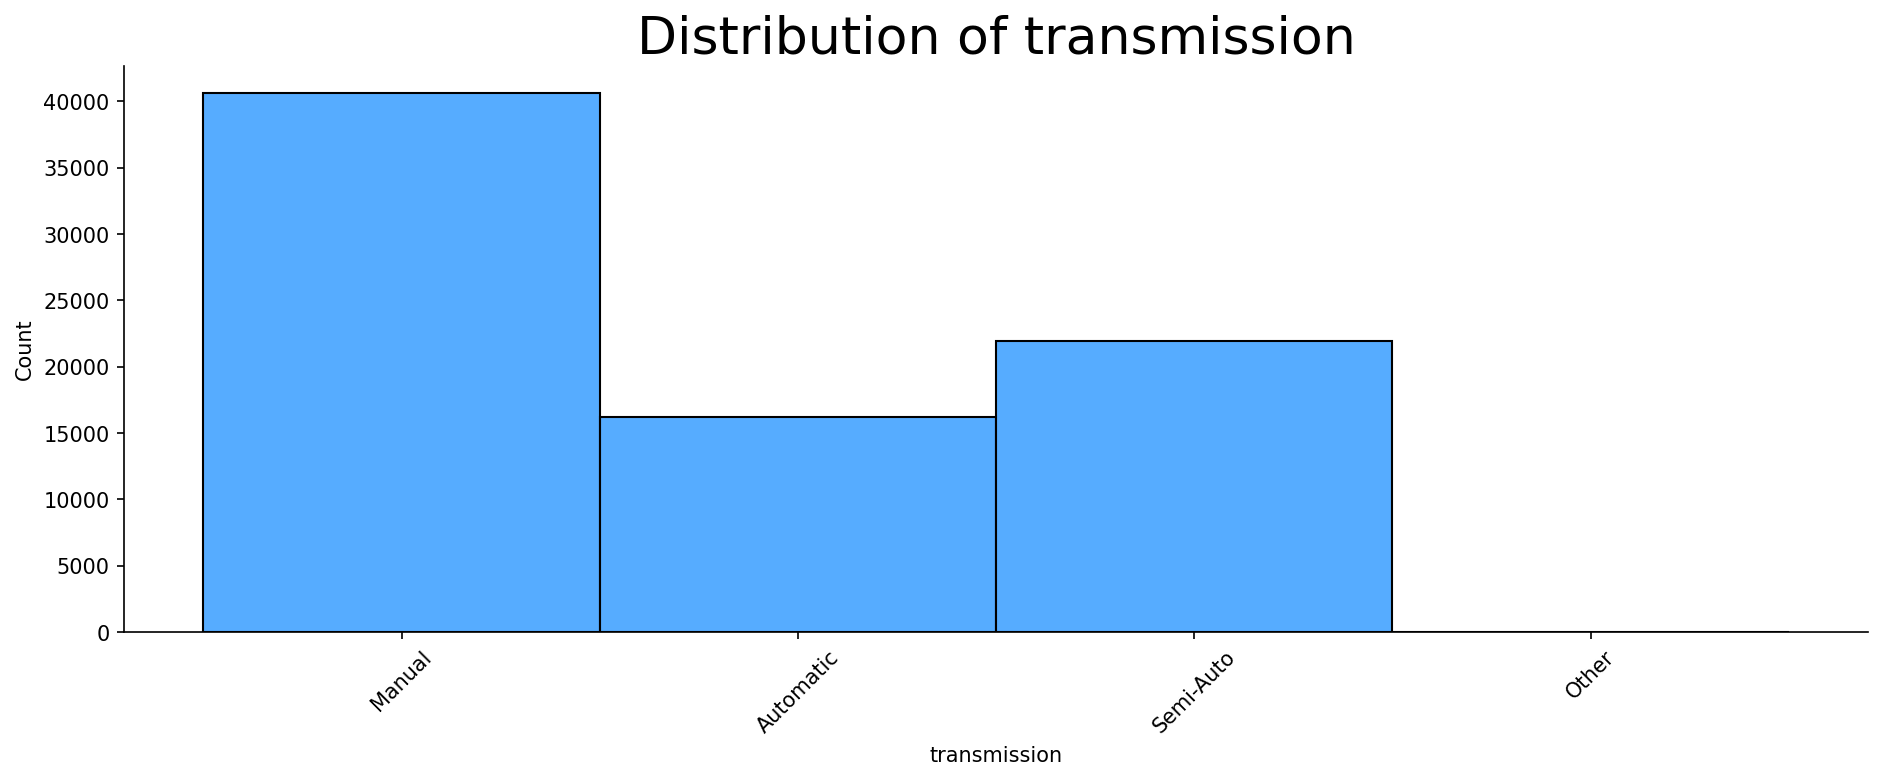

In [9]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = df['transmission'], color = 'dodgerblue', kde = False)
plt.title(f"Distribution of transmission",fontsize = 25)
sns.despine()
plt.xticks(rotation=45)
plt.show()

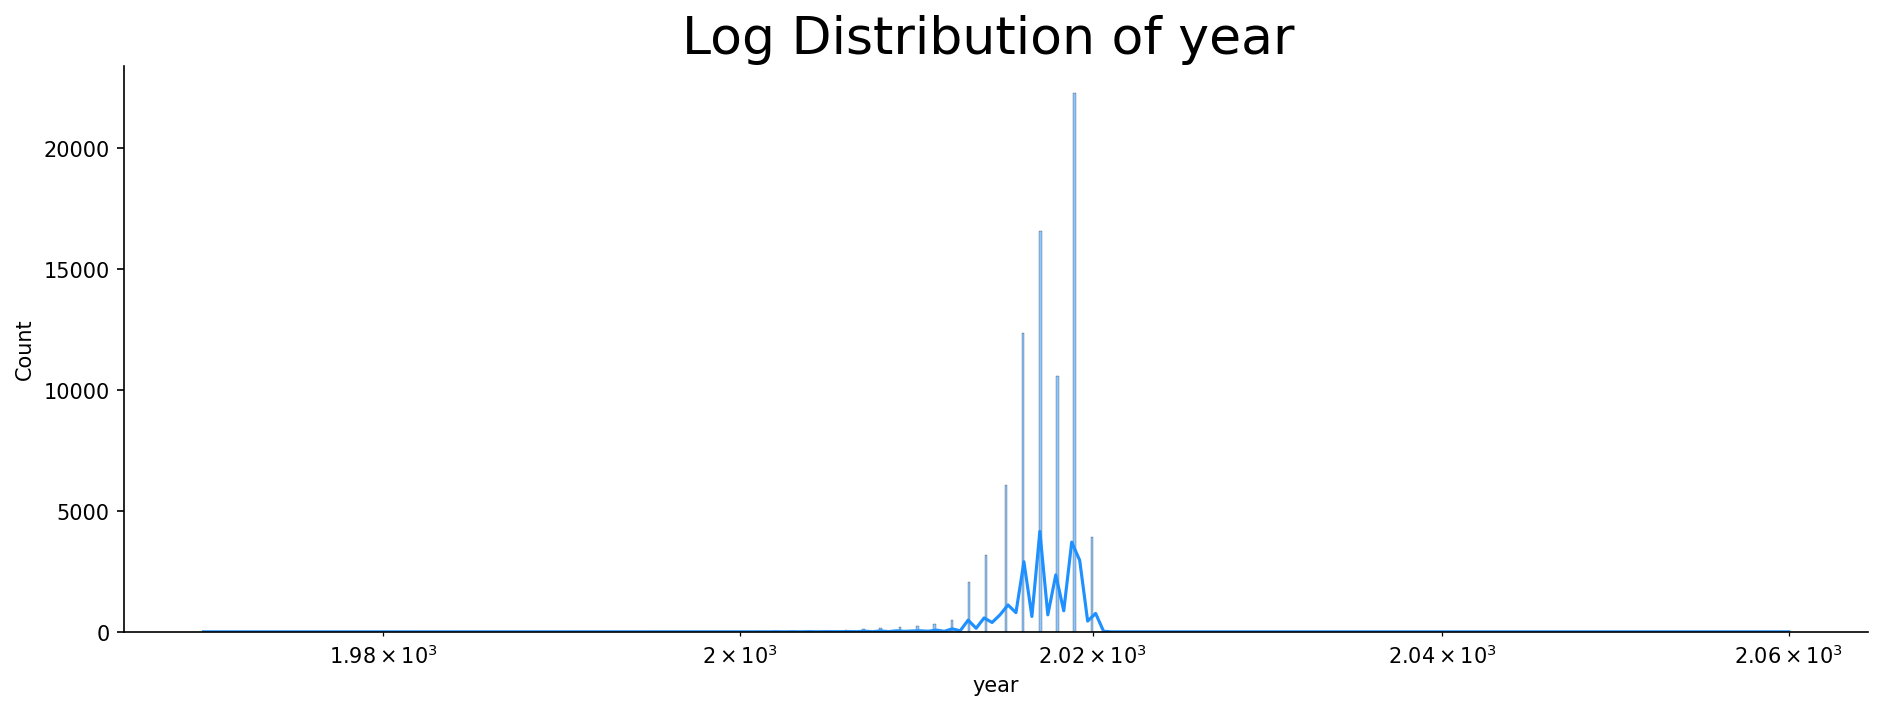

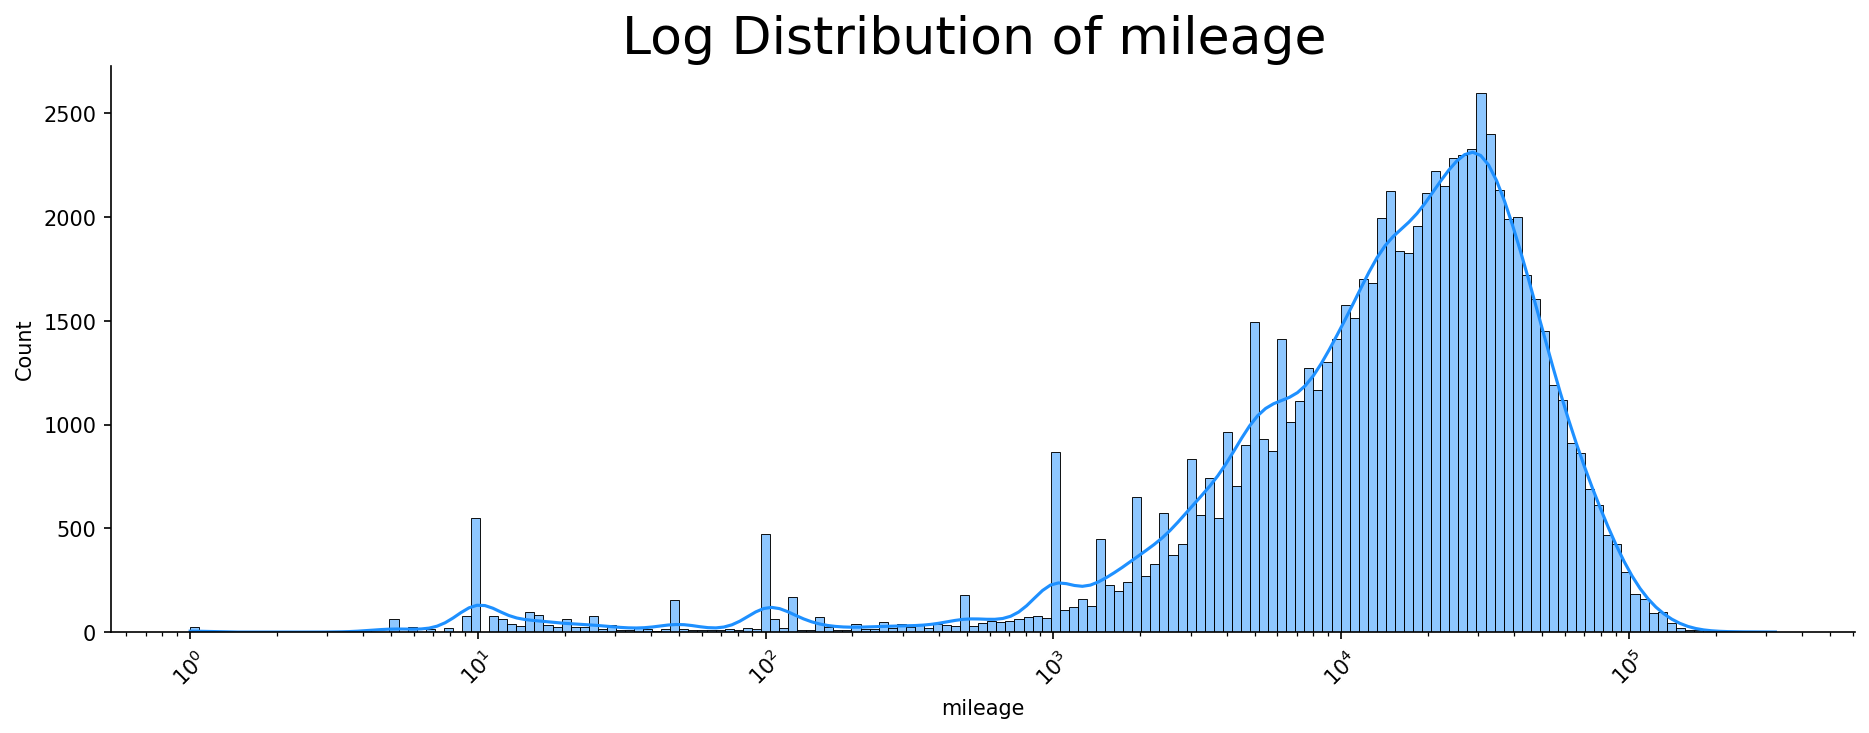

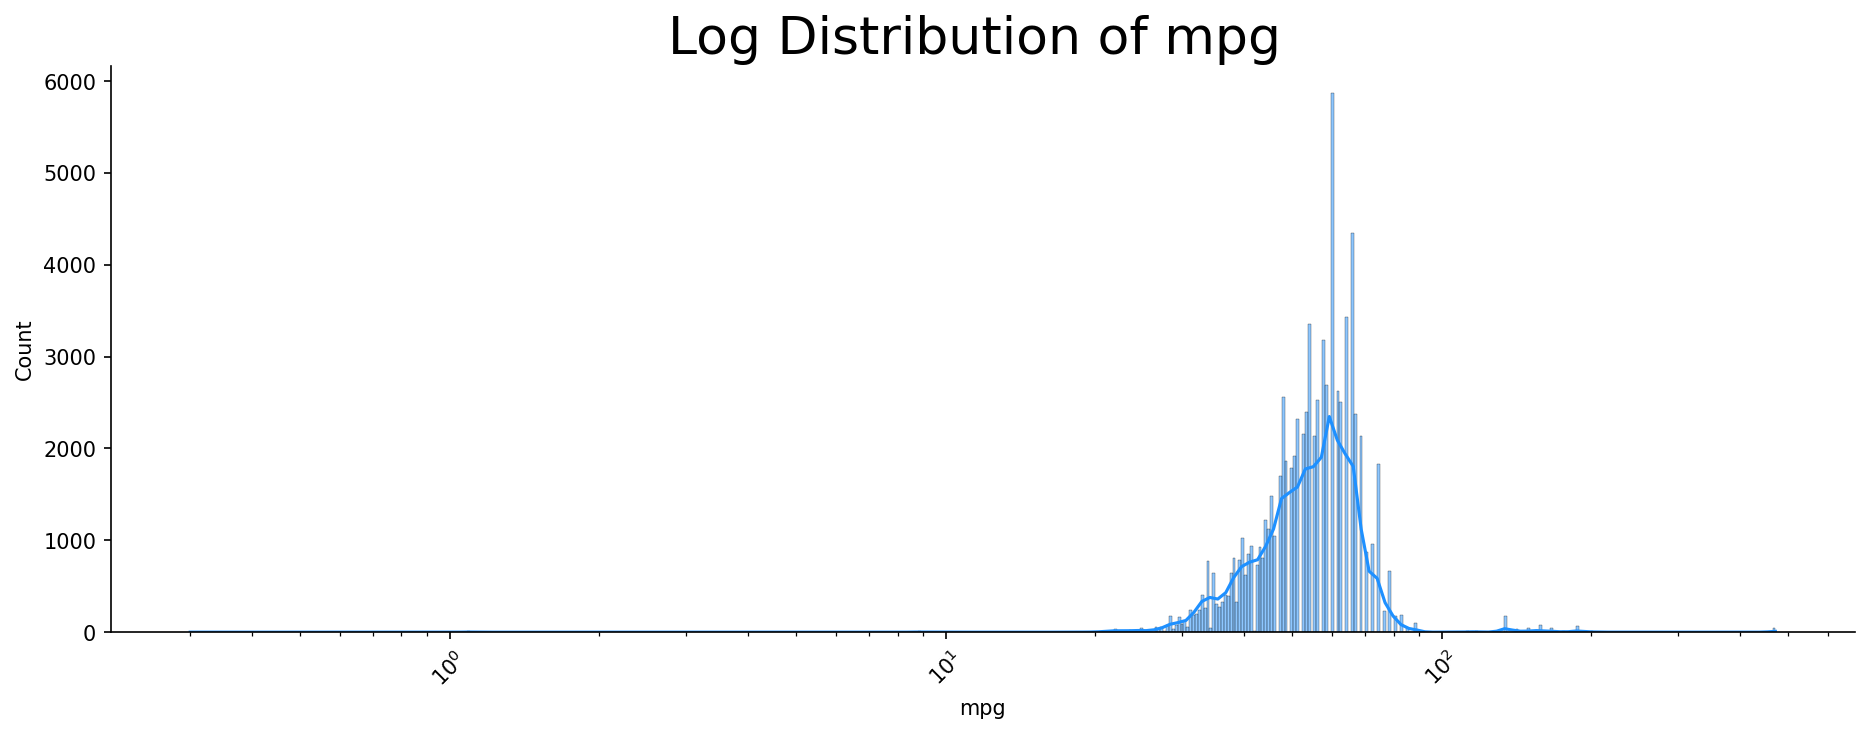

In [10]:
plot_cols = ['year', 'mileage', 'mpg']
for col in plot_cols:
    plt.figure(figsize=(15,5))
    sns.histplot(data = df, x = df[col], color = 'dodgerblue', kde = True, log_scale=True)
    plt.title(f"Log Distribution of {col} ",fontsize = 25)
    sns.despine()
    plt.xticks(rotation=45)
    plt.show()

## Mileage

In [11]:
df.loc[df['fuelType']=='Electric'].shape

(5, 10)

In [12]:
df.loc[df['fuelType']=='Other'].shape

(141, 10)

In [13]:
df.loc[df['fuelType']=='Hybrid'].shape

(1033, 10)

In [14]:
df.drop(df.loc[df['fuelType']=='Electric'].index, inplace=True)

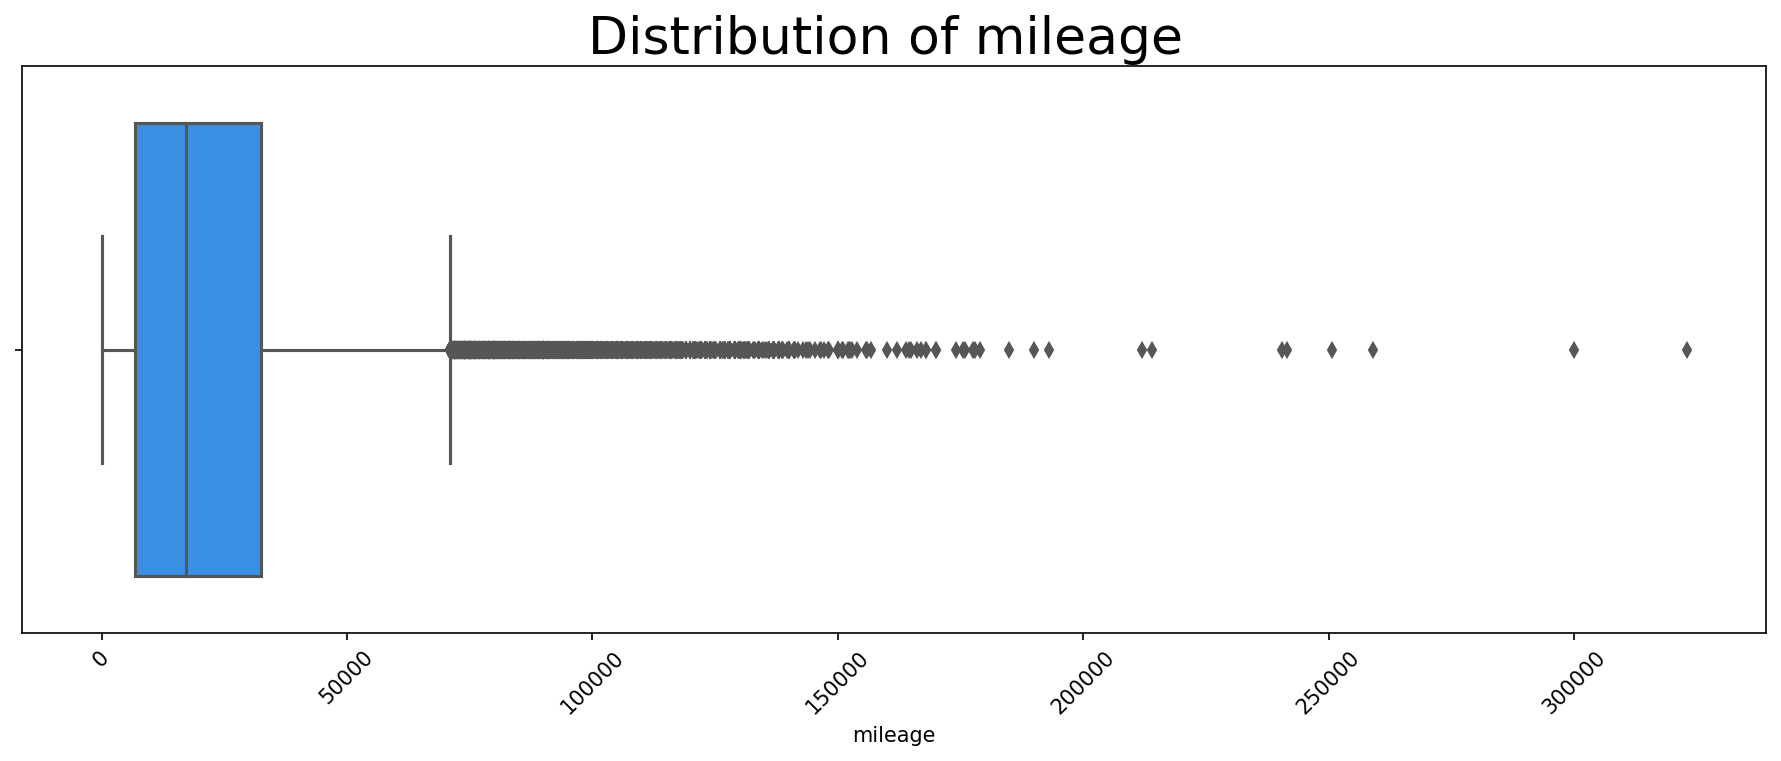

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = df['mileage'], color = 'dodgerblue')
plt.title(f"Distribution of mileage ",fontsize = 25)
# sns.despine()
plt.xticks(rotation=45)
plt.show()

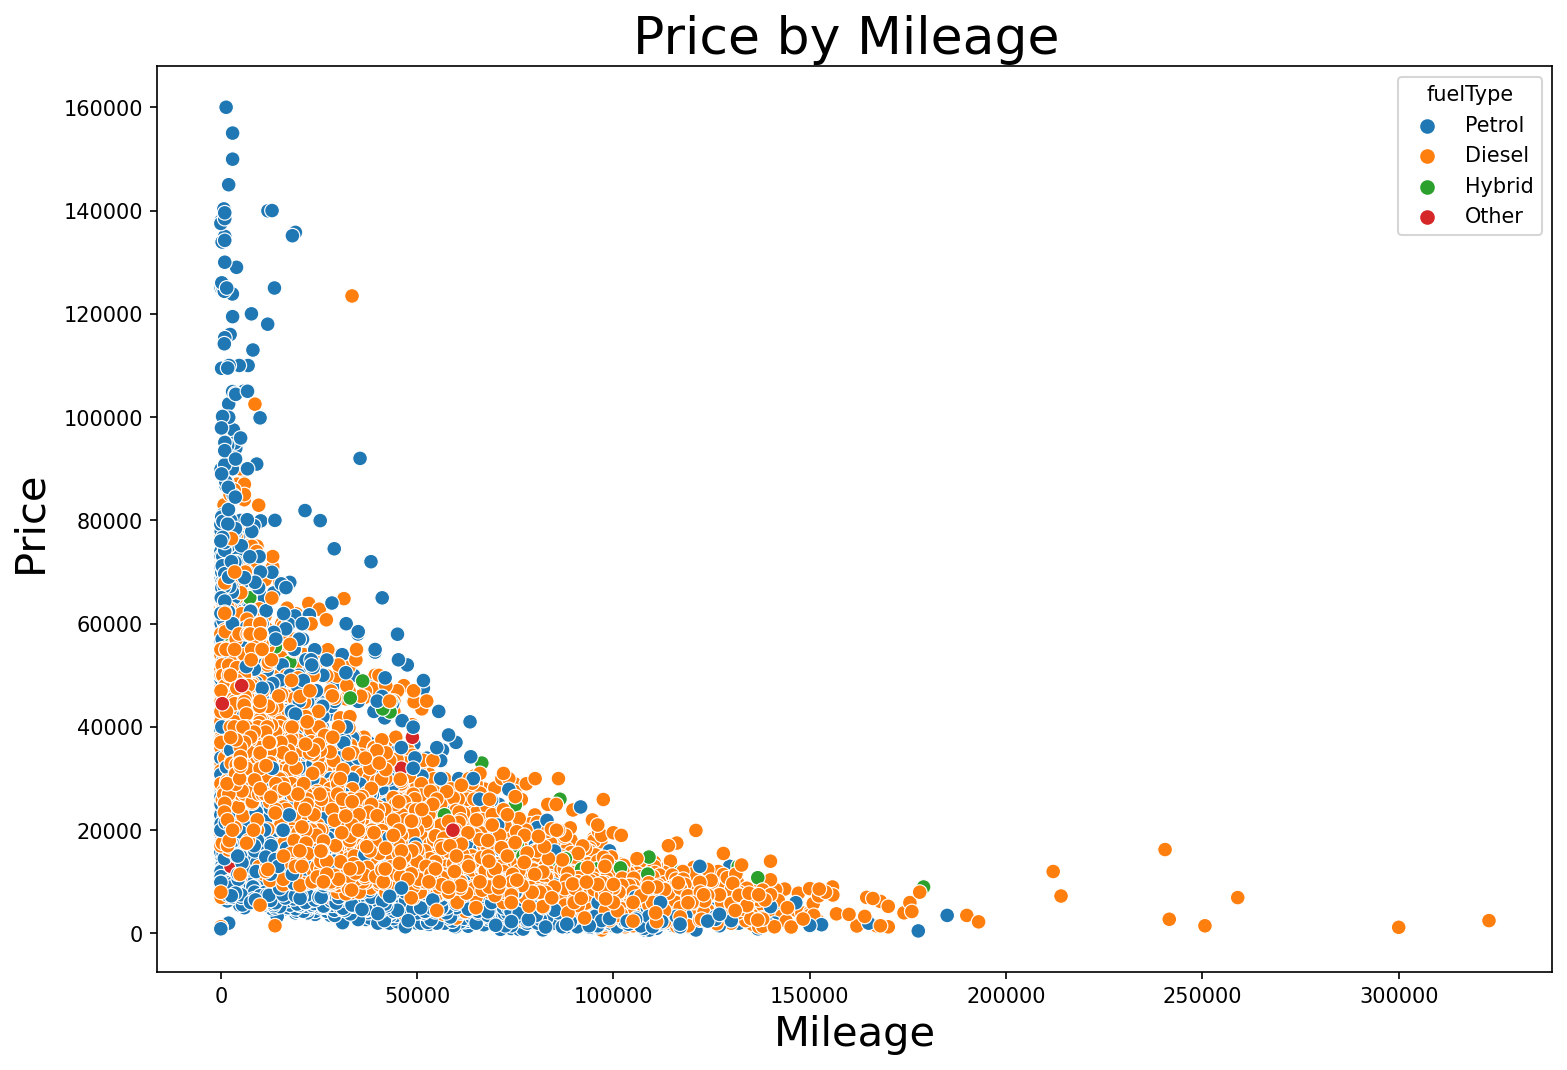

In [16]:
plt.figure(figsize=(12,8))
plt.title("Price by Mileage ",fontsize = 25)
sns.scatterplot(data = df, y = 'price', x = 'mileage', hue = 'fuelType', s = 50)
plt.ylabel("Price ", fontsize = 20)
plt.xlabel("Mileage", fontsize = 20)
# sns.despine()
plt.show()

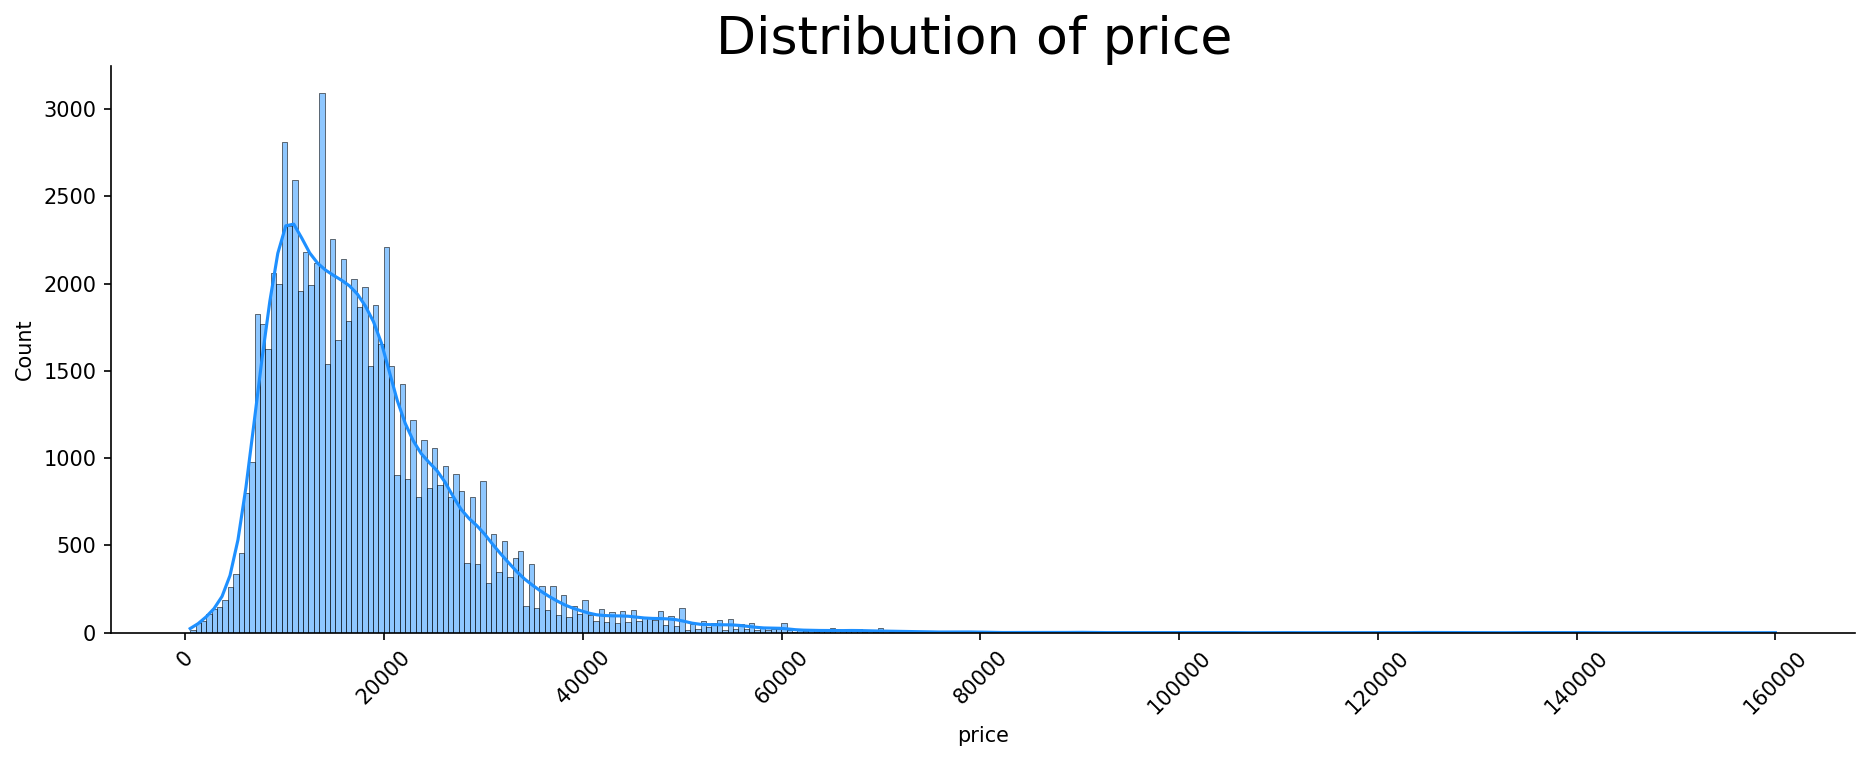

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = df['price'], color = 'dodgerblue', kde = True)
plt.title(f"Distribution of price ",fontsize = 25)
sns.despine()
plt.xticks(rotation=45)
plt.show()

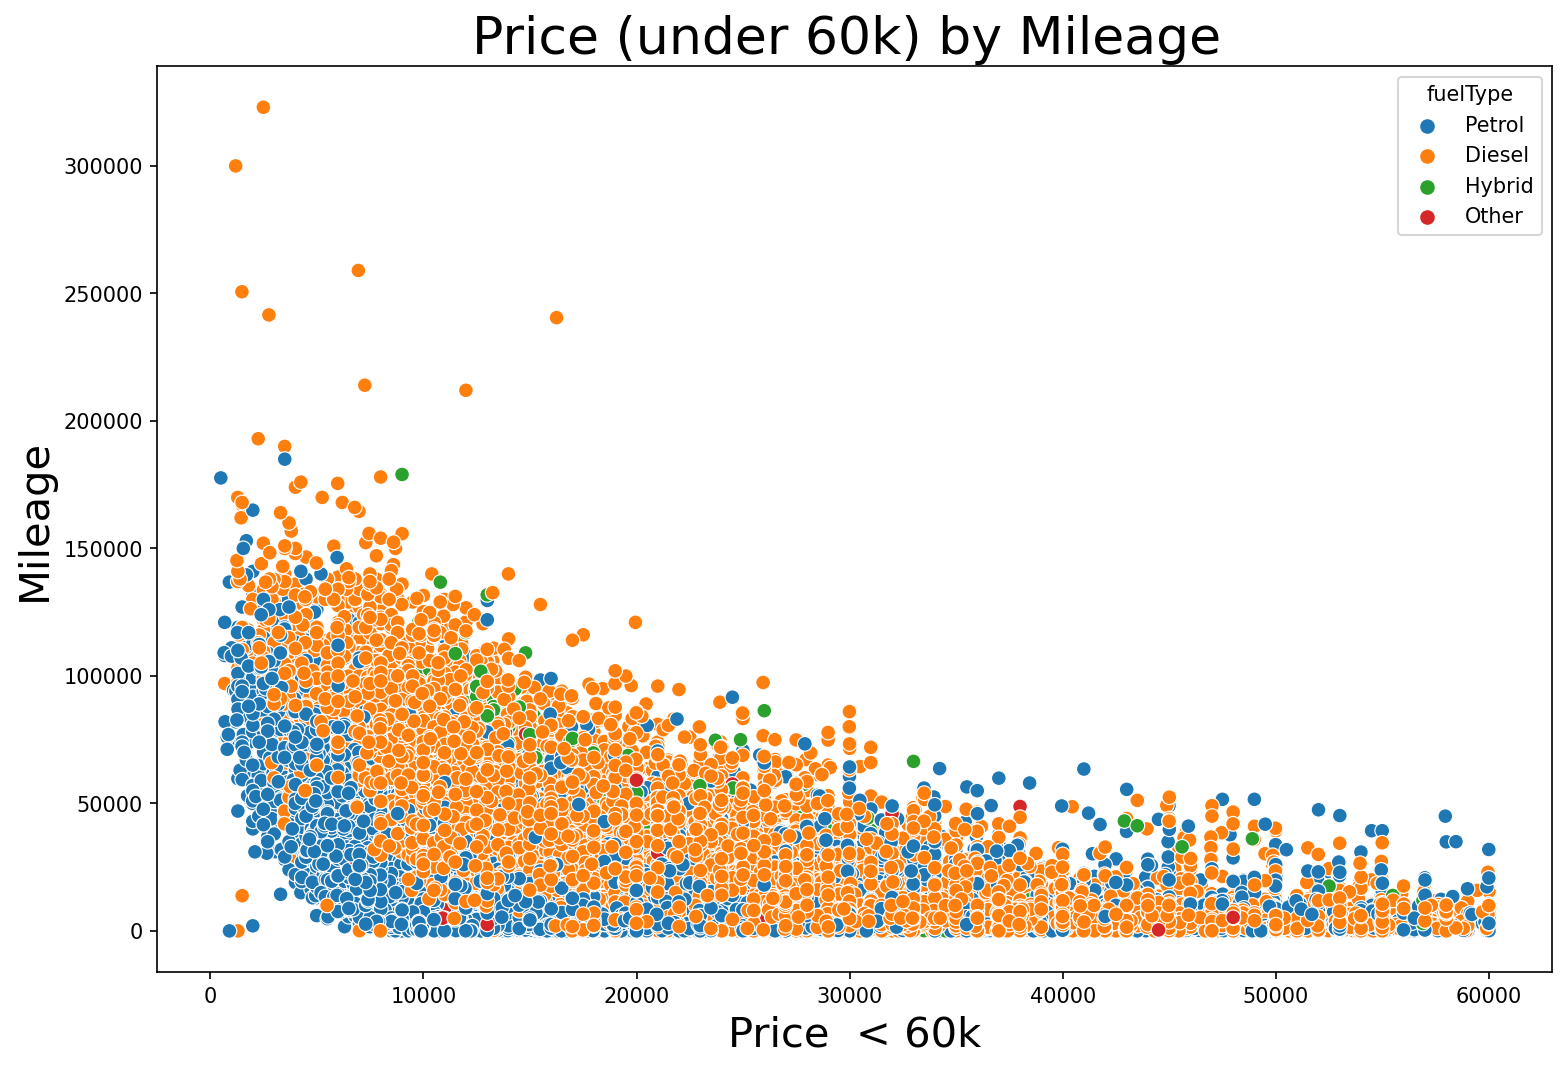

In [18]:
plt.figure(figsize=(12,8))
plt.title("Price (under 60k) by Mileage ",fontsize = 25)
sns.scatterplot(data = df.query('price < 60001'), x = 'price', y = 'mileage', hue = 'fuelType', s = 50)
plt.xlabel("Price  < 60k", fontsize = 20)
plt.ylabel("Mileage", fontsize = 20)
# sns.despine()
plt.show()

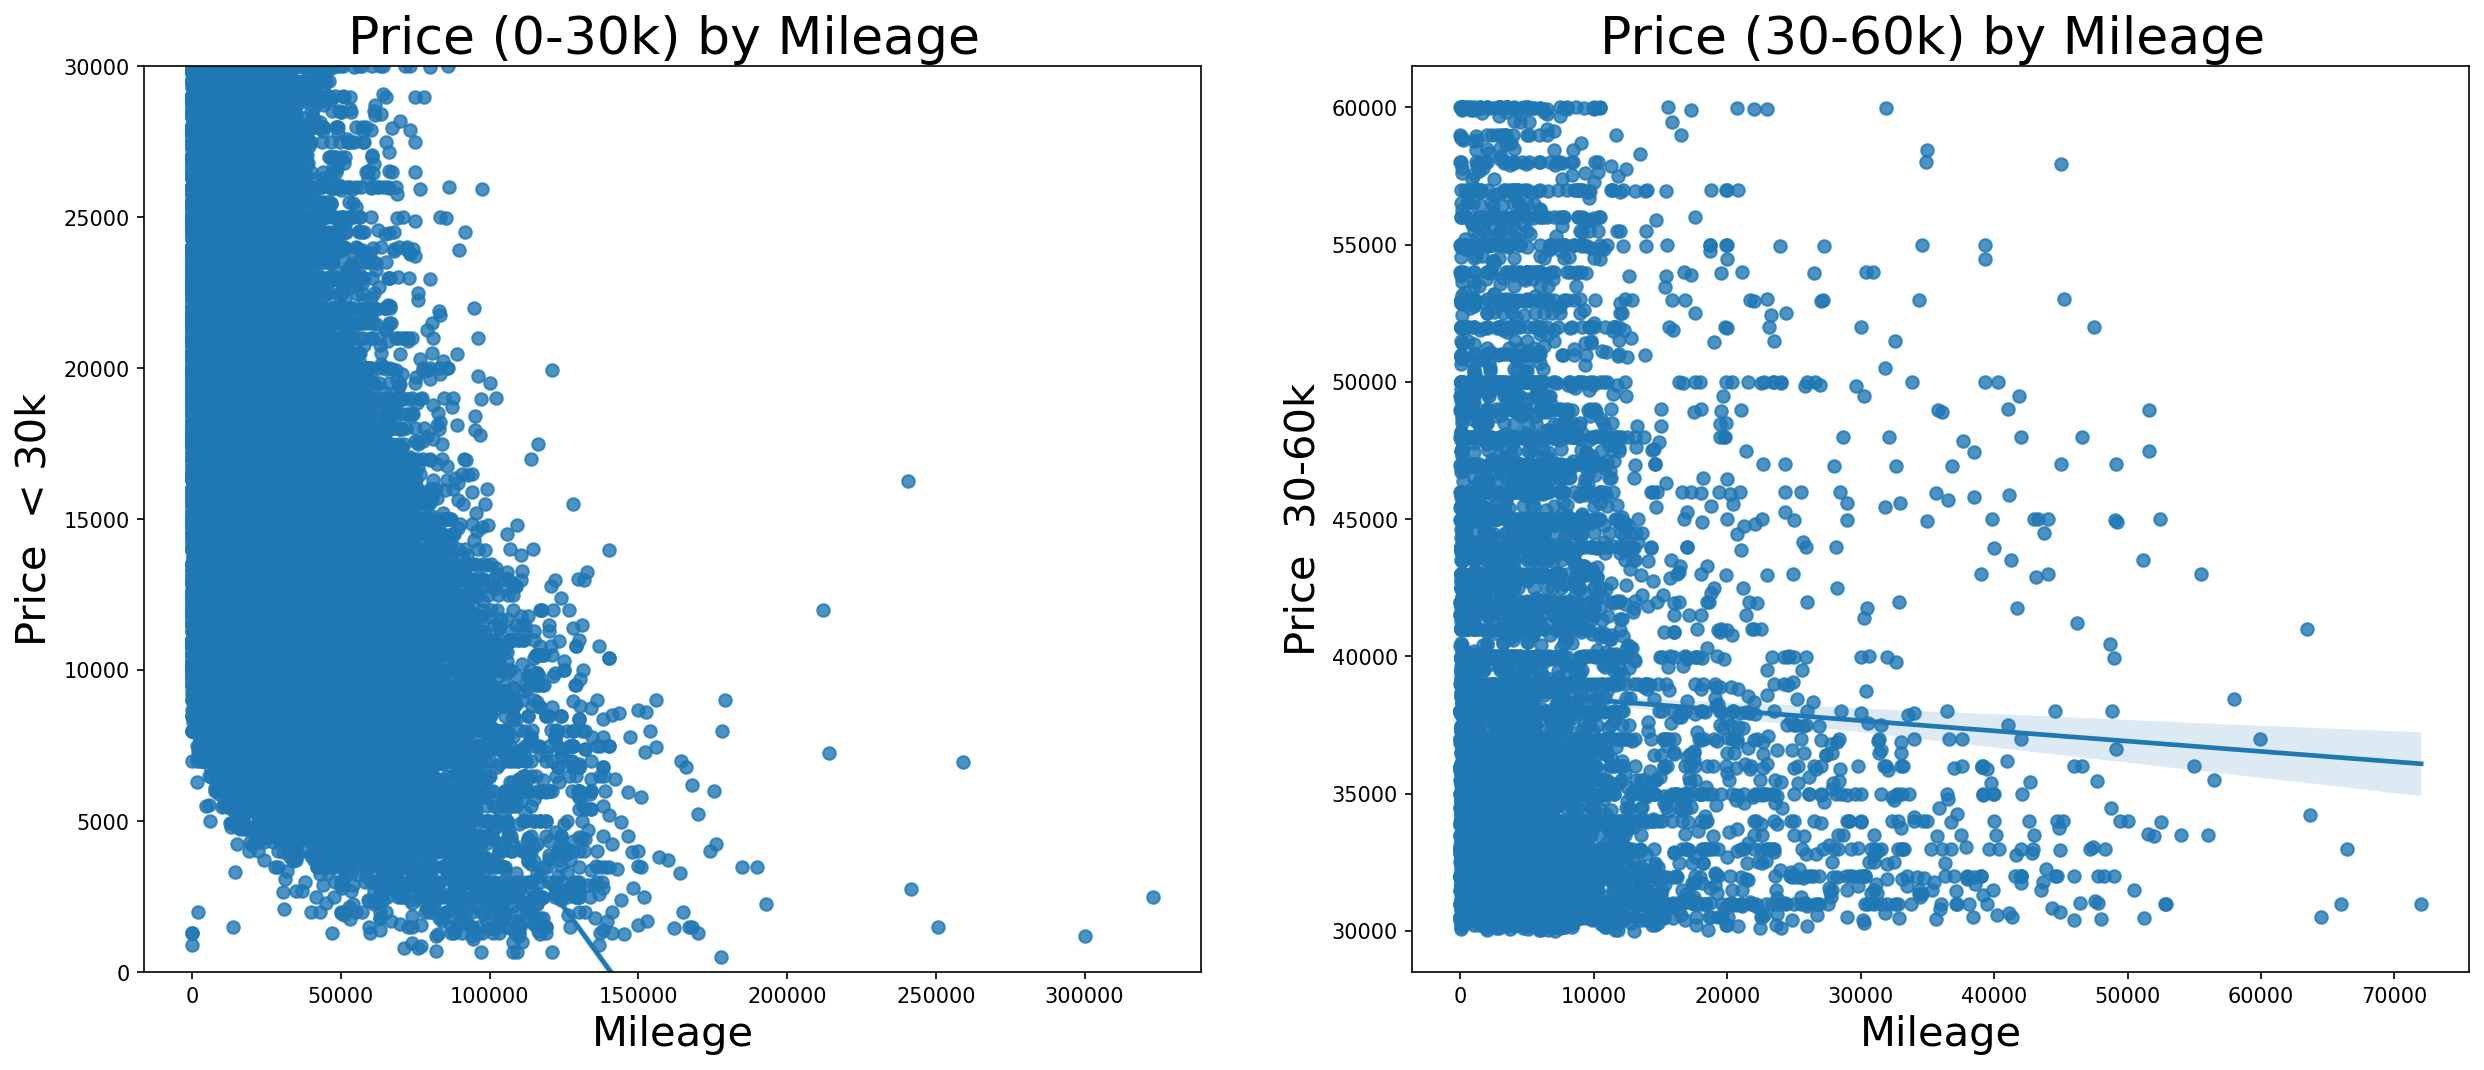

In [19]:
f = plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
plt.title("Price (0-30k) by Mileage ",fontsize = 25)
sns.regplot(data = df.query('price < 30001'), y = 'price', x = 'mileage')
plt.ylabel("Price  < 30k", fontsize = 20)
plt.xlabel("Mileage", fontsize = 20)
plt.ylim(0, 30000)

ax=f.add_subplot(122)
plt.title("Price (30-60k) by Mileage ",fontsize = 25)
sns.regplot(data = df.query('price > 30000 and price < 60001'), y = 'price', x = 'mileage')
plt.ylabel("Price  30-60k", fontsize = 20)
plt.xlabel("Mileage", fontsize = 20)

# sns.despine()
plt.show()

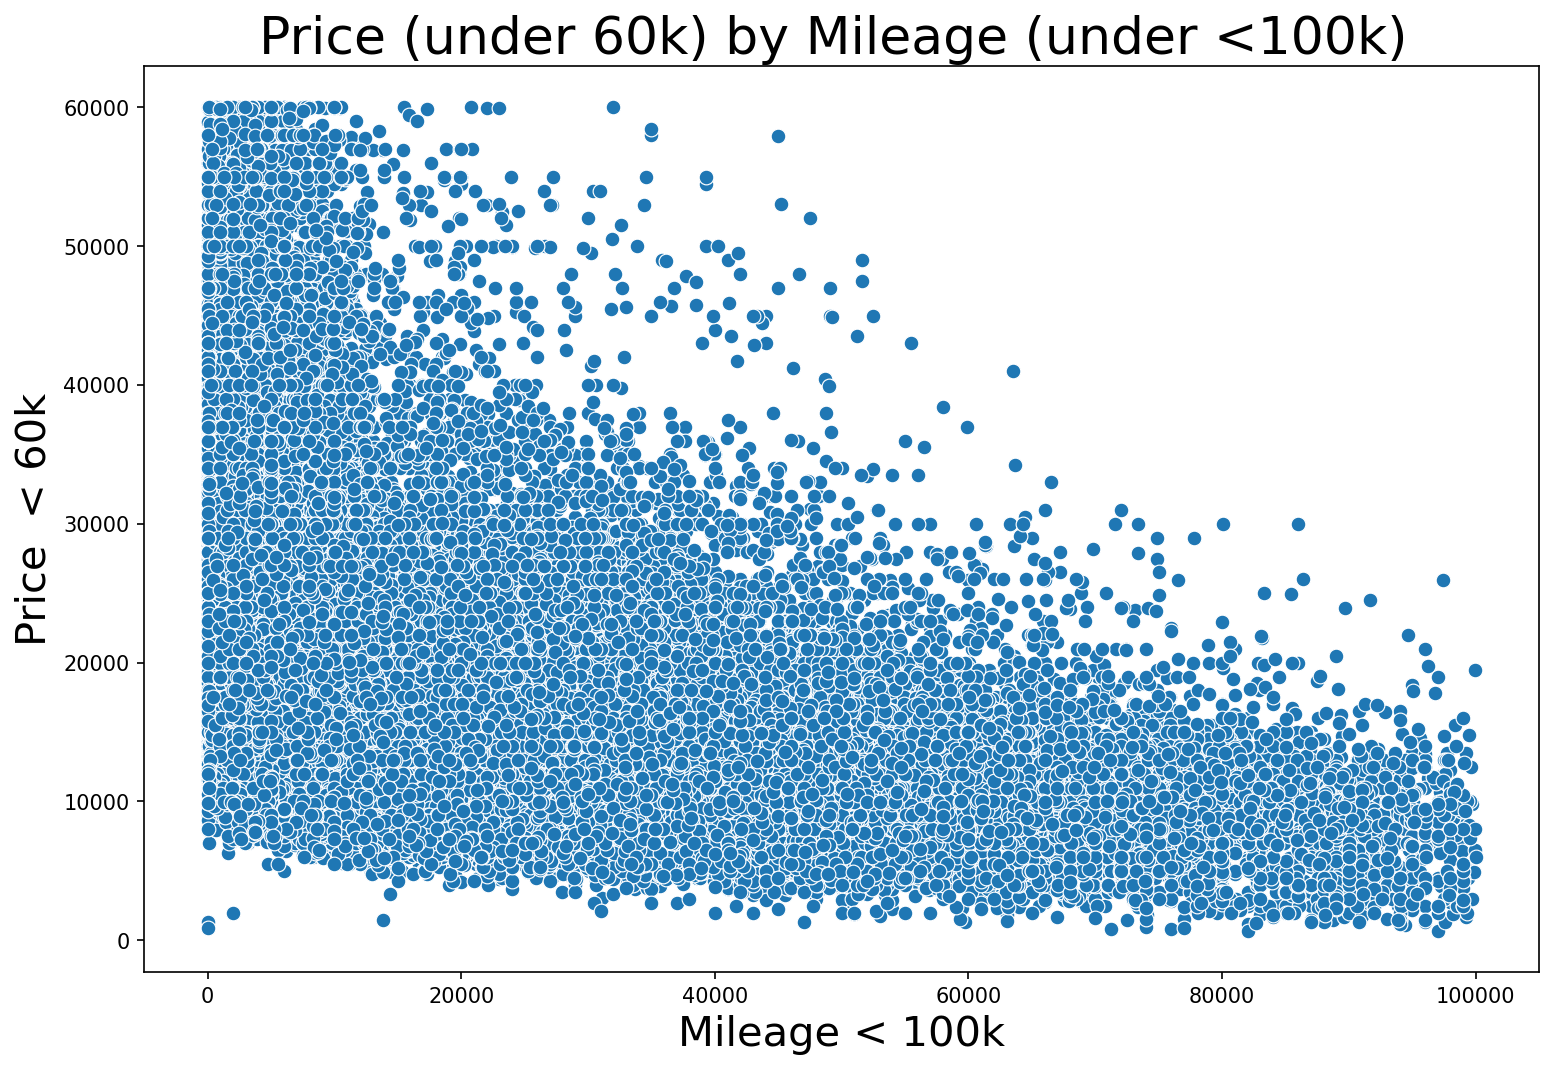

In [20]:
plt.figure(figsize=(12,8))
plt.title("Price (under 60k) by Mileage (under <100k) ",fontsize = 25)
sns.scatterplot(data = df.query('price < 60001 and mileage < 100000'), y = 'price', x = 'mileage', s = 50)
plt.ylabel("Price  < 60k", fontsize = 20)
plt.xlabel("Mileage < 100k", fontsize = 20)
# sns.despine()
plt.show()

From the scatter plots above, as the mileage increases the price of the car decreases. More the car is used and driven, its prices depreciates as expected.

## Year

In [21]:
df['year'].value_counts()

2019    22298
2017    16588
2016    12348
2018    10563
2015     6049
2020     3907
2014     3192
2013     2077
2012      495
2011      320
2010      254
2009      211
2008      154
2007      116
2006       64
2005       49
2004       38
2003       23
2002       22
2001       17
2000        8
1998        7
1999        5
1997        3
1996        2
2060        1
1970        1
Name: year, dtype: int64

In [22]:
df.query('year==2060')

make    model  year  price transmission  mileage fuelType  tax   mpg  \
39175  ford   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

       engineSize  
39175         1.4

In [23]:
df.drop(df.loc[df['year']==2060].index, inplace=True)
df.drop(df.loc[df['year']==1970].index, inplace=True)

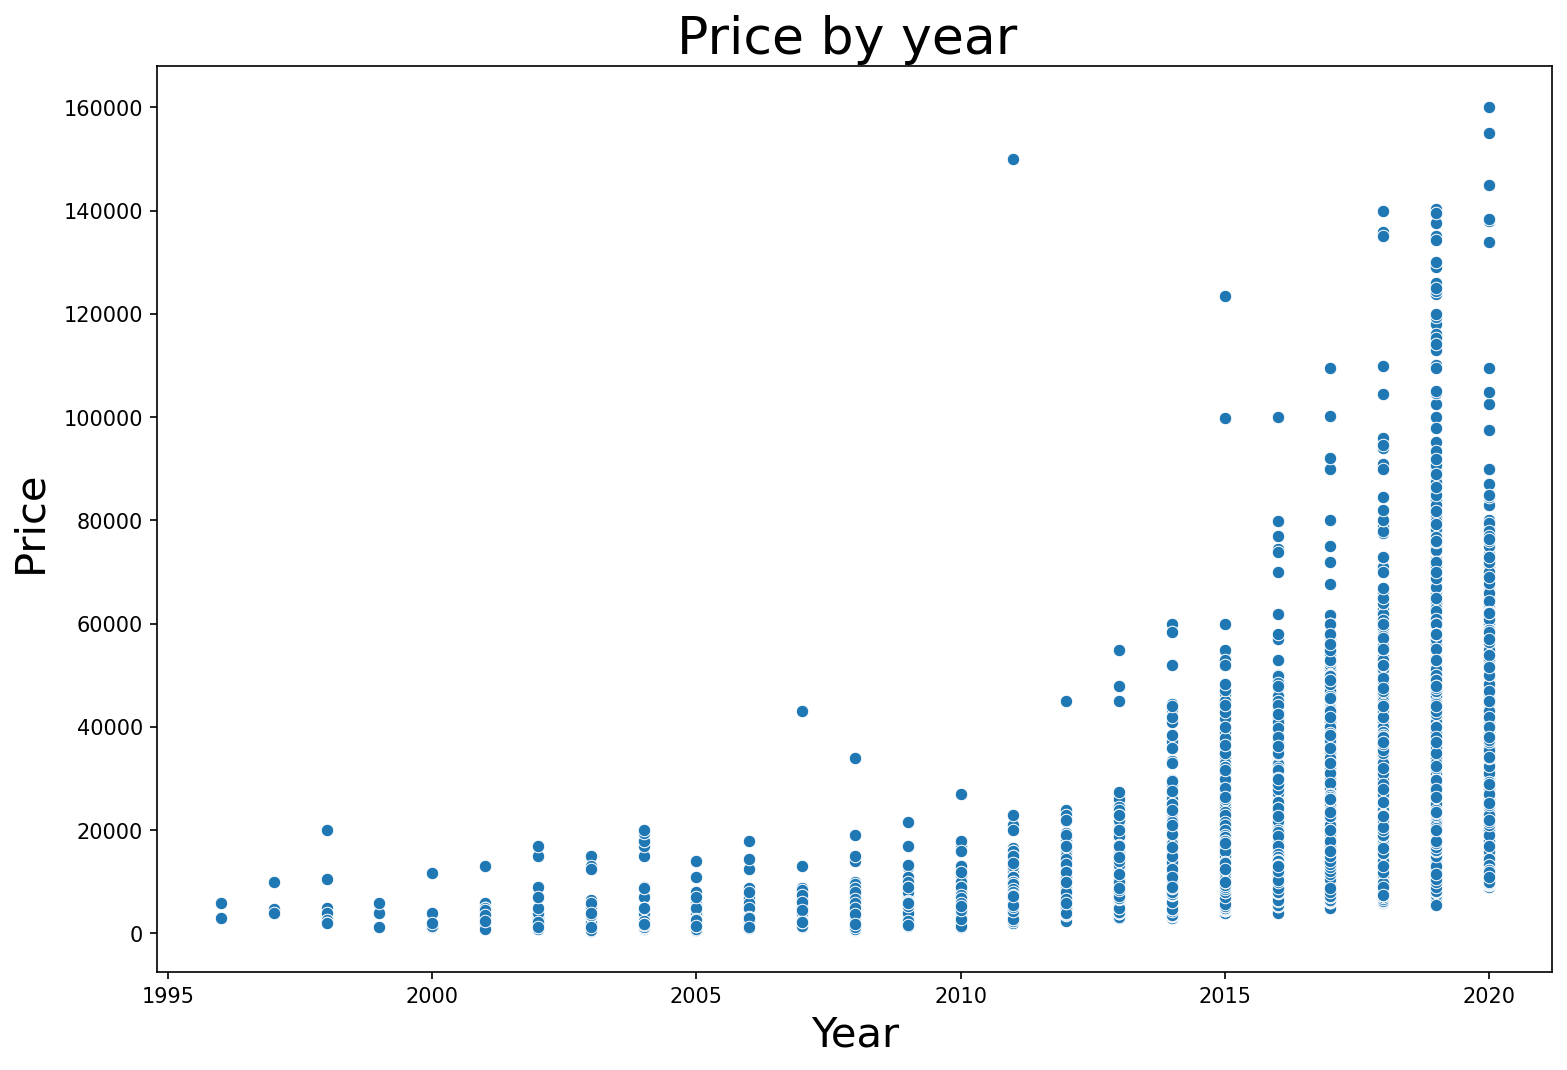

In [24]:
plt.figure(figsize=(12,8))
plt.title("Price by year ",fontsize = 25)
sns.scatterplot(data = df, y = 'price', x = 'year')
plt.ylabel("Price ", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
# sns.despine()
plt.show()

As we can see, prices of the newest cars (cars purchased recently) is more as compared to older cars.

In [25]:
morethan2015 = df.loc[df['year']>=2015]
lessthan2015 = df.loc[df['year']<2015]

In [26]:
morethan2015['price'].describe()

count     71753.000000
mean      19184.863044
std       10246.153446
min        3990.000000
25%       11998.000000
50%       16998.000000
75%       23490.000000
max      159999.000000
Name: price, dtype: float64

In [27]:
lessthan2015['price'].describe()

count      7057.000000
mean       9061.282131
std        4867.102576
min         495.000000
25%        5995.000000
50%        8295.000000
75%       11300.000000
max      149948.000000
Name: price, dtype: float64

In [25]:
df.head(2)

make model  year  price transmission  mileage fuelType  tax   mpg  \
0  audi    A1  2017  12500       Manual    15735   Petrol  150  55.4   
1  audi    A6  2016  16500    Automatic    36203   Diesel   20  64.2   

   engineSize  
0         1.4  
1         2.0

## Transmission

In [26]:
#manual
manual = df.loc[df['transmission']=='Manual']
manual['priceBins'] = pd.cut(manual['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])

#automatic
automatic = df.loc[df['transmission']=='Automatic']
automatic['priceBins'] = pd.cut(automatic['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])

#semi-automatic
semi_automatic = df.loc[df['transmission']=='Semi-Auto']
semi_automatic['priceBins'] = pd.cut(semi_automatic['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])

In [27]:
print('Manual:', manual.shape)
print('Automatic:', automatic.shape)
print('Semi Automatic:', semi_automatic.shape)

Manual: (40639, 11)
Automatic: (16208, 11)
Semi Automatic: (21958, 11)


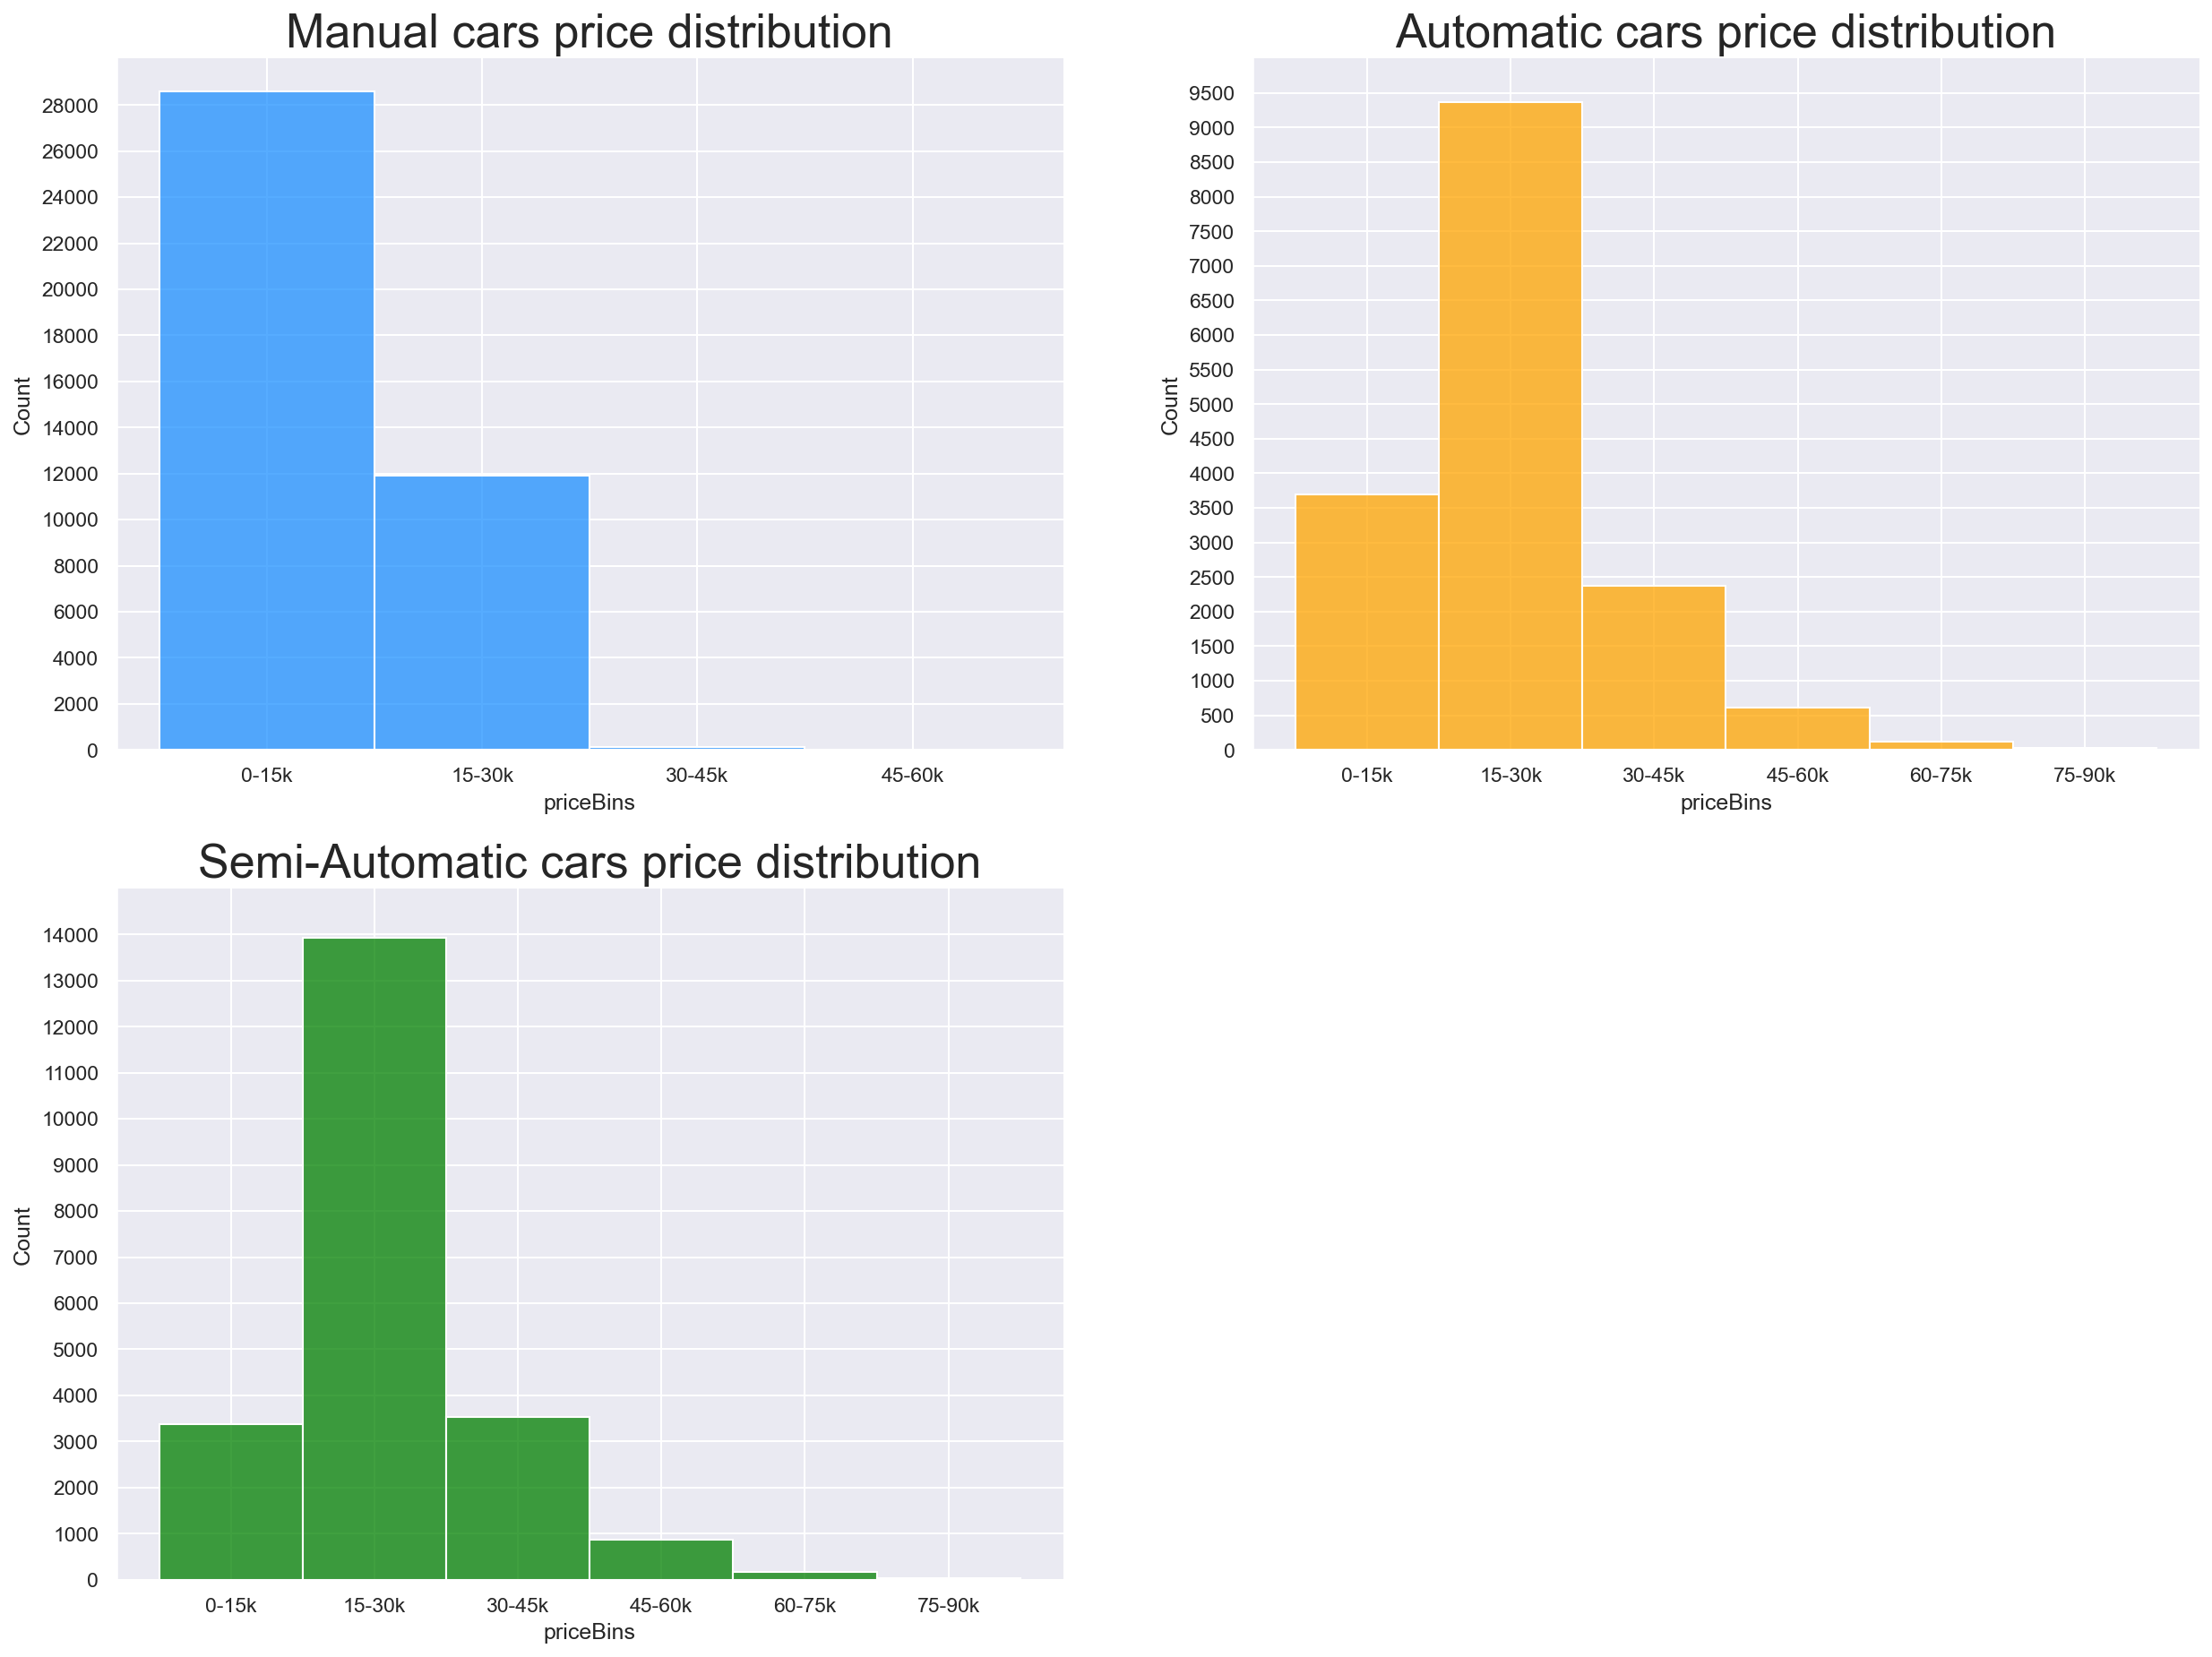

In [43]:
fig = plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.set(style="darkgrid")
sns.histplot(data = manual, x = manual['priceBins'], color = 'dodgerblue', kde = False)
plt.title(f"Manual cars price distribution",fontsize = 25)
sns.despine()
plt.yticks(np.arange(0, 30000, step=2000))
# plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.set(style="darkgrid")
sns.histplot(data = automatic, x = automatic['priceBins'], color = 'Orange', kde = False)
plt.title(f"Automatic cars price distribution",fontsize = 25)
sns.despine()
plt.ylim(0, 10000)
plt.yticks(np.arange(0, 10000, step=500))
# plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.set(style="darkgrid")
sns.histplot(data = semi_automatic, x = semi_automatic['priceBins'], color = 'Green', kde = False)
plt.title(f"Semi-Automatic cars price distribution",fontsize = 25)
sns.despine()
plt.ylim(0, 15000)
plt.yticks(np.arange(0, 15000, step=1000))

plt.show()

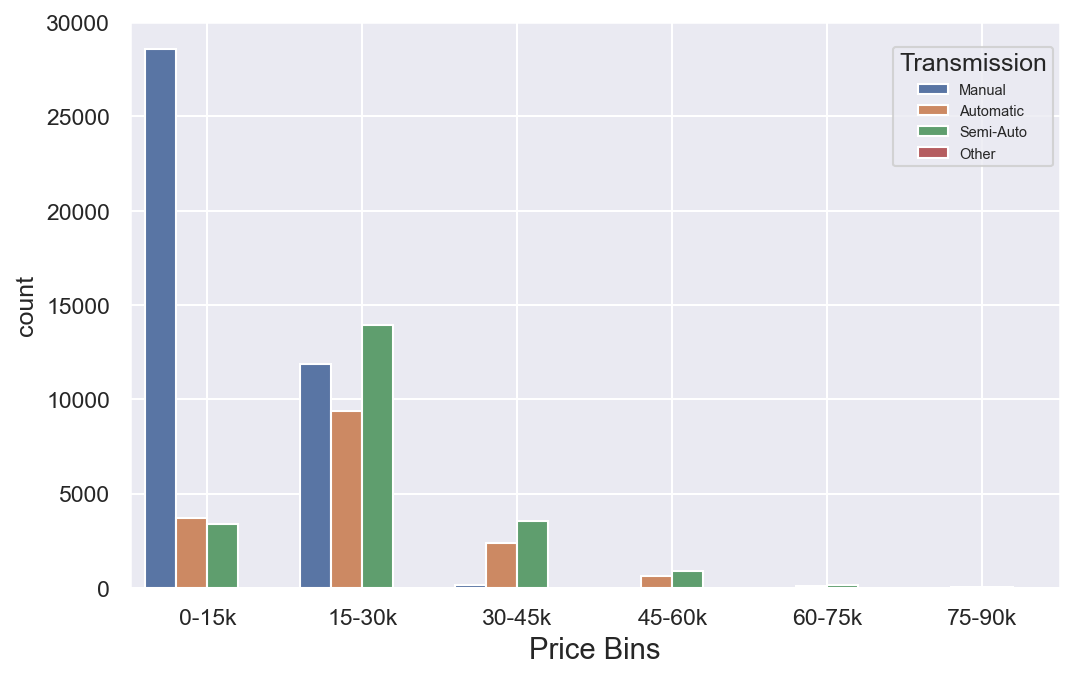

In [57]:
df['priceBins'] = pd.cut(df['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])

fig = plt.figure(figsize = (8,5))
sns.set(style="darkgrid")
sns.countplot(data=df, x='priceBins', hue='transmission')
plt.legend(bbox_to_anchor=(1,0.85), title="Transmission", fontsize=7, loc='right')
plt.xlabel('Price Bins', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

Automatic and semi automatic car prices are more as compared to manual cars. Most of the manual transmission car's price range lies between 0-30k where as the price range for automatic and semi-automatic cars is 15-45k.

In [29]:
df.head(2)

make model  year  price transmission  mileage fuelType  tax   mpg  \
0  audi    A1  2017  12500       Manual    15735   Petrol  150  55.4   
1  audi    A6  2016  16500    Automatic    36203   Diesel   20  64.2   

   engineSize  
0         1.4  
1         2.0

## Fuel Type

In [30]:
df['fuelType'].value_counts()

Petrol    40035
Diesel    37601
Hybrid     1033
Other       141
Name: fuelType, dtype: int64

In [34]:
#petrol
petrol = df.loc[df['fuelType']=='Petrol']
petrol['priceBins'] = pd.cut(petrol['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])

#diesel
diesel = df.loc[df['fuelType']=='Diesel']
diesel['priceBins'] = pd.cut(diesel['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])

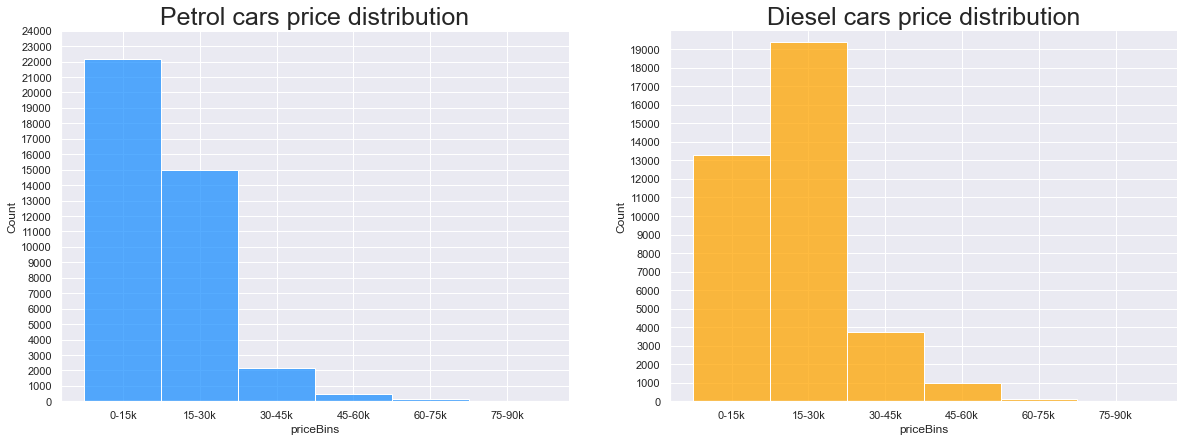

In [36]:
fig = plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.set(style="darkgrid")
sns.histplot(data = petrol, x = petrol['priceBins'], color = 'dodgerblue', kde = False)
plt.title(f"Petrol cars price distribution",fontsize = 25)
sns.despine()
plt.yticks(np.arange(0, 25000, step=1000))
# plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.set(style="darkgrid")
sns.histplot(data = diesel, x = diesel['priceBins'], color = 'Orange', kde = False)
plt.title(f"Diesel cars price distribution",fontsize = 25)
sns.despine()
plt.ylim(0, 20000)
plt.yticks(np.arange(0, 20000, step=1000))
# plt.xticks(rotation=45)

plt.show()

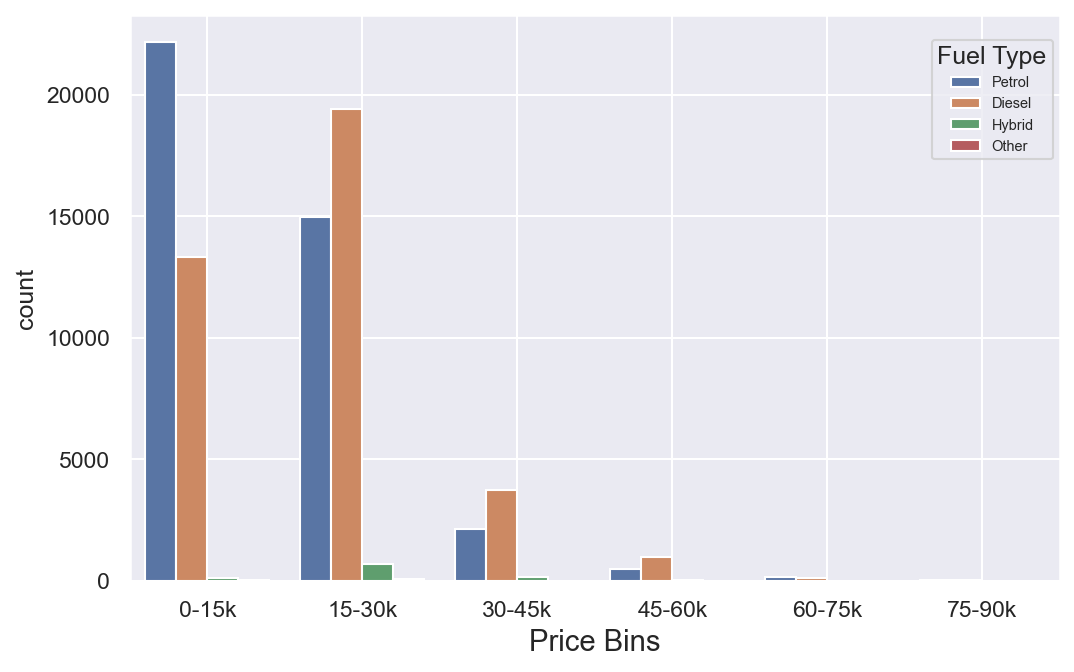

In [59]:
df['priceBins'] = pd.cut(df['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])

fig = plt.figure(figsize = (8,5))
sns.countplot(data=df, x='priceBins', hue='fuelType')
plt.legend(bbox_to_anchor=(1,0.85), title="Fuel Type", fontsize=7, loc='right')
plt.xlabel('Price Bins', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

Diesel cars have more price than the petrol cars. Most diesel car prices range from 15-30k where as most petrol cars are sold in the price between 0-15k.

In [44]:
df.head(2)

make model  year  price transmission  mileage fuelType  tax   mpg  \
0  audi    A1  2017  12500       Manual    15735   Petrol  150  55.4   
1  audi    A6  2016  16500    Automatic    36203   Diesel   20  64.2   

   engineSize  
0         1.4  
1         2.0

## Tax

In [47]:
df['tax'].describe()

count    78810.000000
mean       121.026710
std         63.090799
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

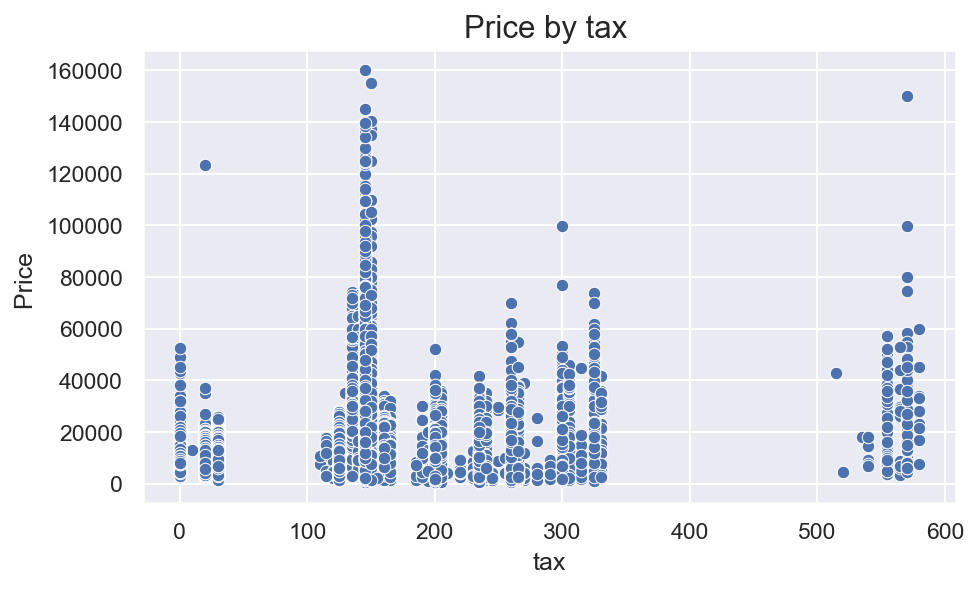

In [52]:
plt.figure(figsize=(7,4))
plt.title("Price by tax ",fontsize = 15)
sns.scatterplot(data = df, y = 'price', x = 'tax')
plt.ylabel("Price ")
plt.xlabel("Tax")
# sns.despine()
plt.show()

In [60]:
df['priceBins'] = pd.cut(df['price'],bins=[0,15000,30000,45000,60000,75000,90000],
                             labels=["0-15k","15-30k","30-45k","45-60k","60-75k", "75-90k"])
df['taxBins'] = pd.cut(df['tax'],bins=[0,100,200,300,400,500,600],
                             labels=["0-100","100-200","200-300","300-400","400-500", "500-600"])

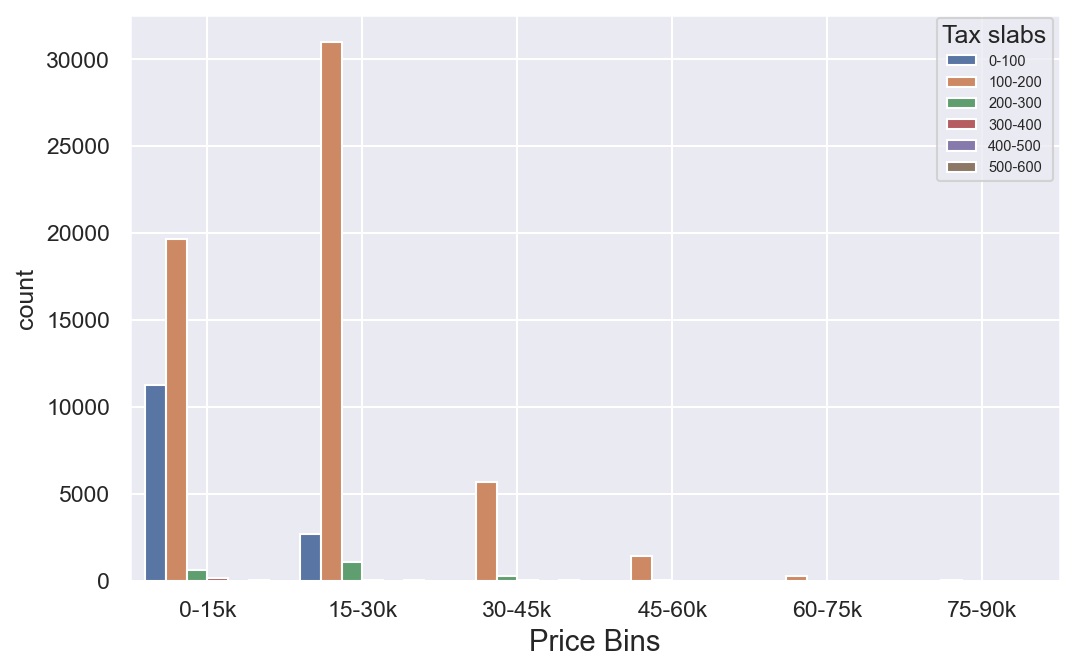

In [61]:
fig = plt.figure(figsize = (8,5))
sns.countplot(data=df, x='priceBins', hue='taxBins')
plt.legend(bbox_to_anchor=(1,0.85), title="Tax slabs", fontsize=7, loc='right')
plt.xlabel('Price Bins', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

From the graphs above, most of the cars sold in the range 15-30k have a tax slab of 100-200 units. Most of the cars priced between 0-15k have a tax ranging between 0-200.

In [62]:
df.head(2)

make model  year  price transmission  mileage fuelType  tax   mpg  \
0  audi    A1  2017  12500       Manual    15735   Petrol  150  55.4   
1  audi    A6  2016  16500    Automatic    36203   Diesel   20  64.2   

   engineSize priceBins  taxBins  
0         1.4     0-15k  100-200  
1         2.0    15-30k    0-100

## MPG

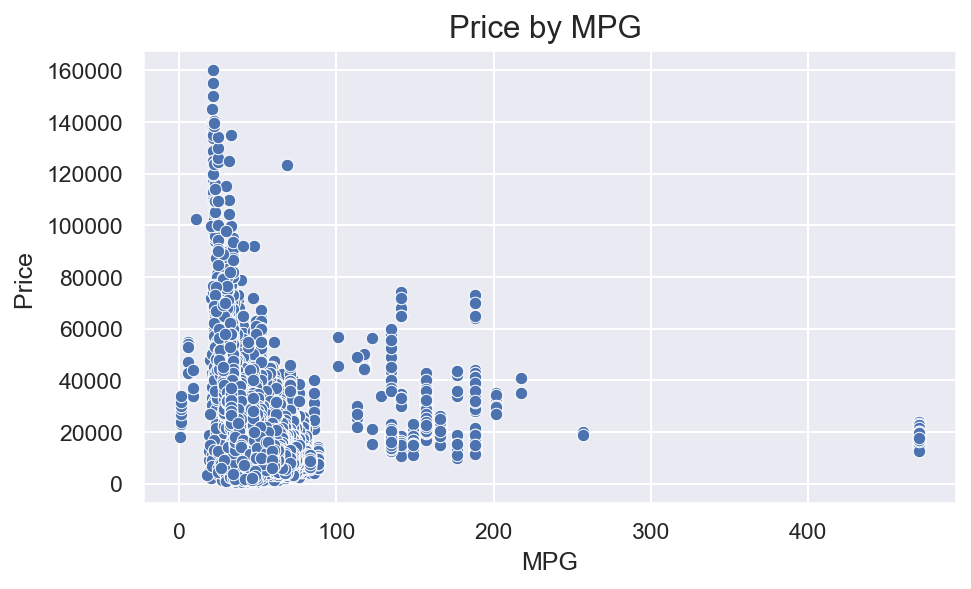

In [63]:
plt.figure(figsize=(7,4))
plt.title("Price by MPG ",fontsize = 15)
sns.scatterplot(data = df, y = 'price', x = 'mpg')
plt.ylabel("Price ")
plt.xlabel("MPG")
# sns.despine()
plt.show()

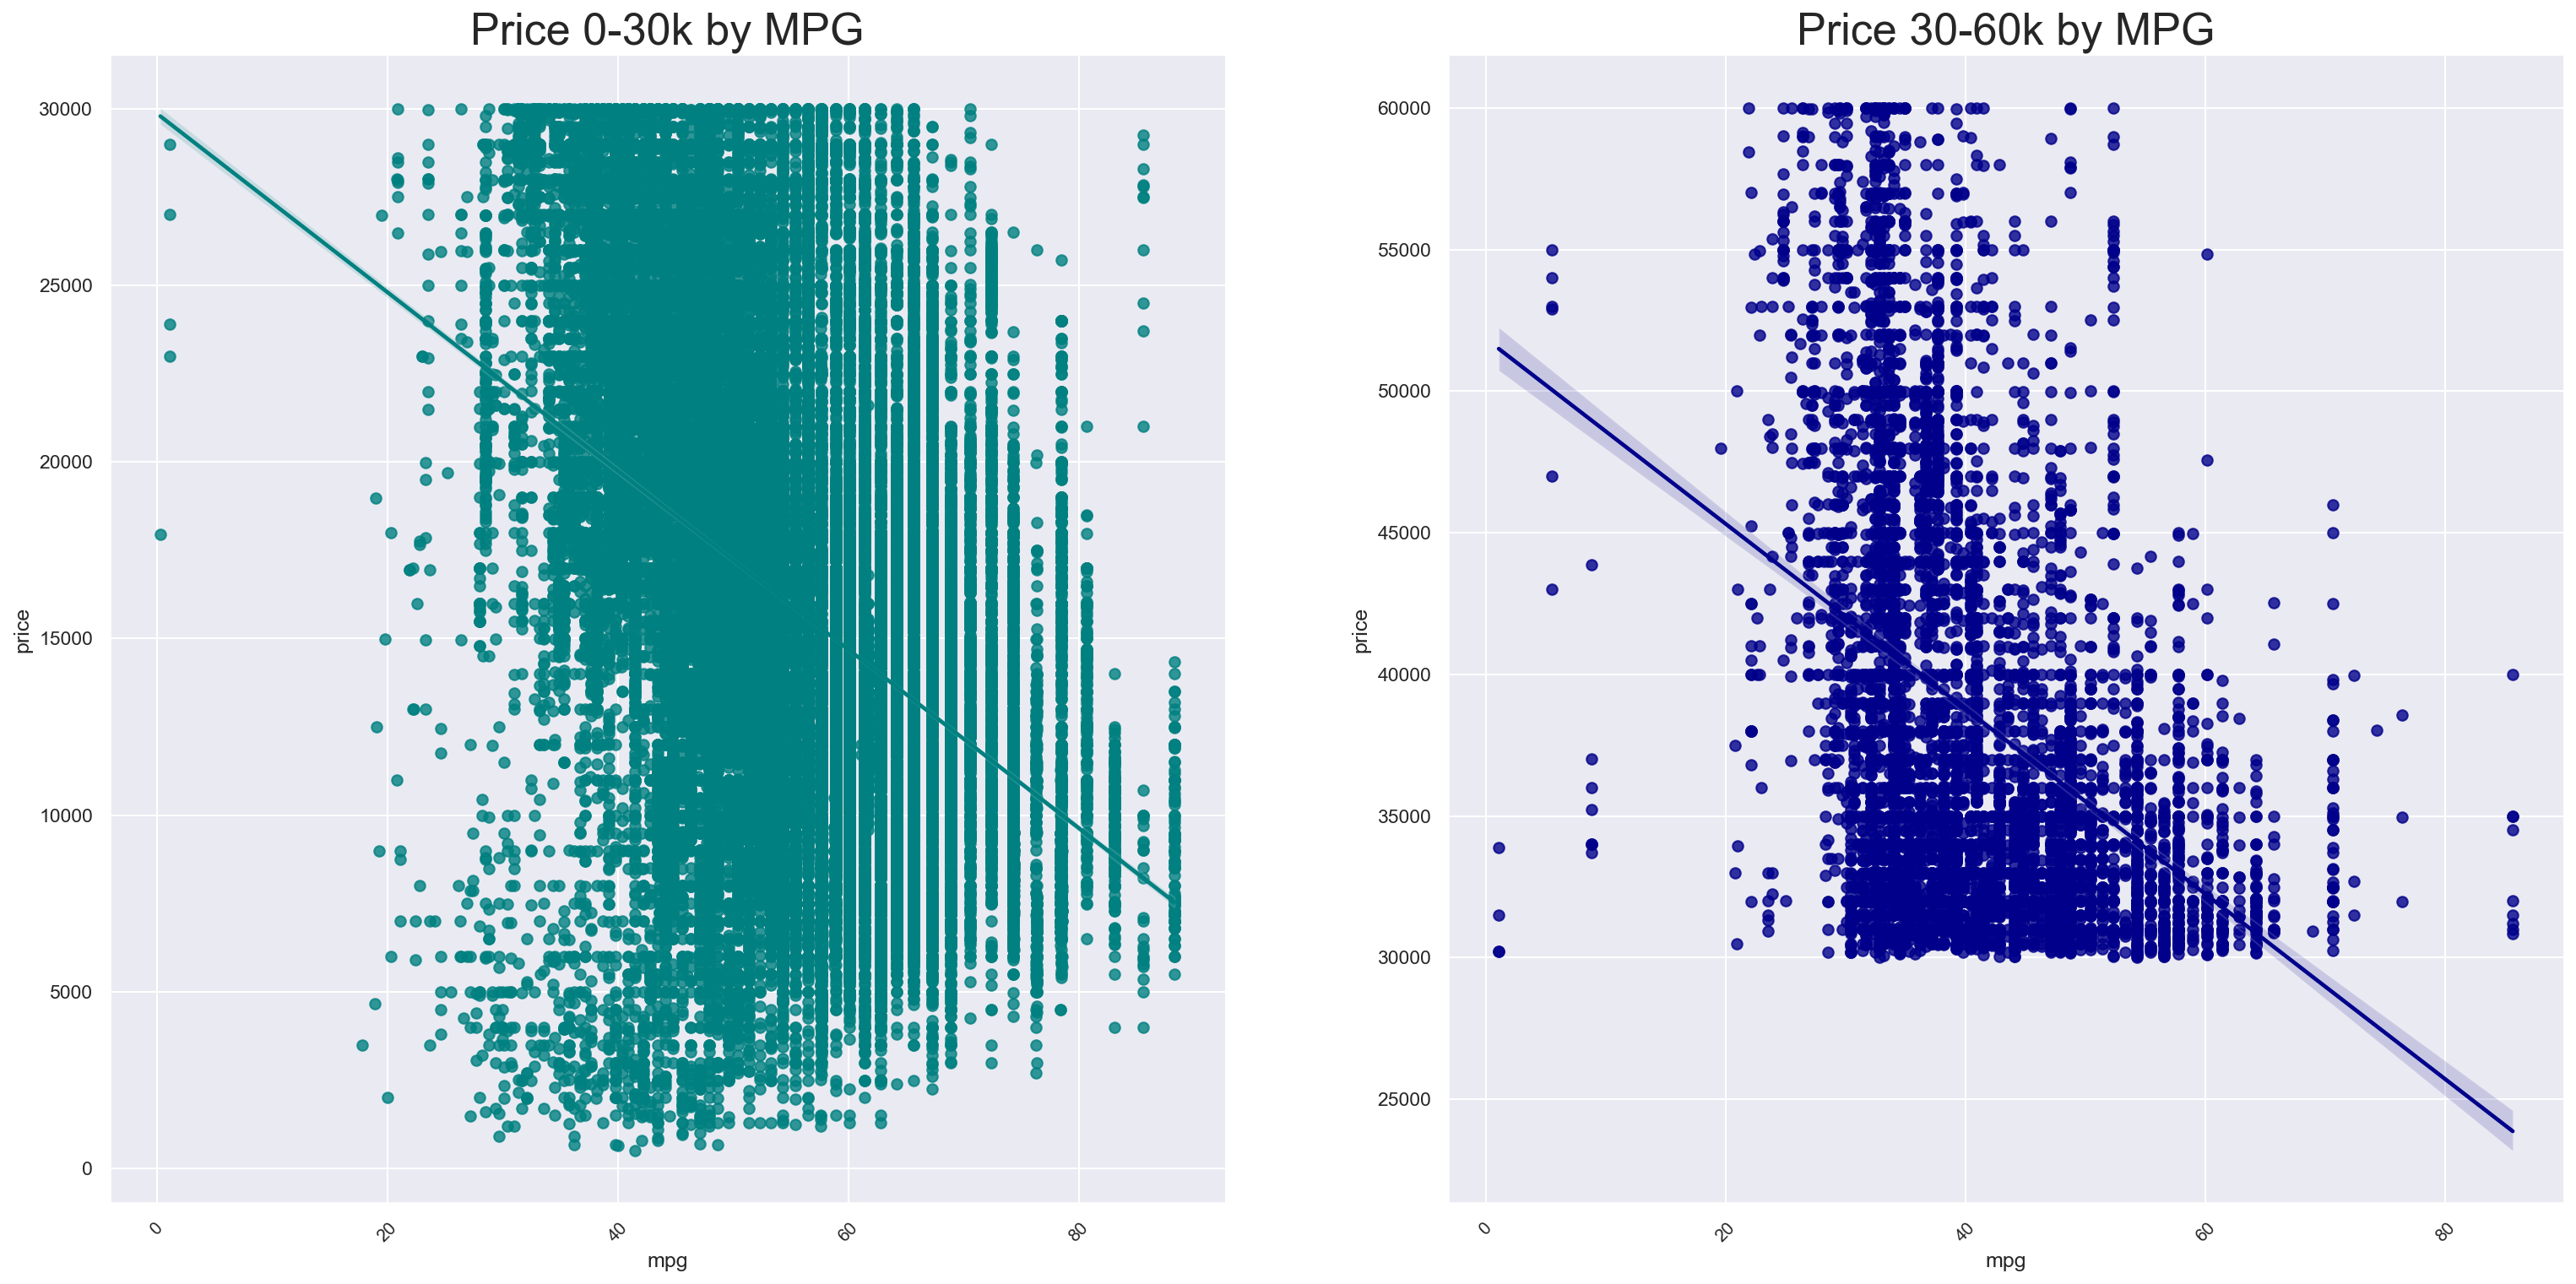

In [64]:
f= plt.figure(figsize=(25,12))

ax=f.add_subplot(121)
sns.regplot(data = df.query('price < 30000 and mpg < 100'), x = 'mpg', y='price', color = 'teal')
ax.set_title('Price 0-30k by MPG', fontsize = 25, )
plt.xticks(rotation=45,size=10)

ax=f.add_subplot(122)
sns.regplot(data = df.query('price > 30000 and price <60000 and mpg < 100'), x = 'mpg',y='price',color = 'darkblue')
ax.set_title('Price 30-60k by MPG', fontsize = 25, )
sns.despine()
plt.xticks(rotation=45,size = 10)
plt.show()

In [65]:
df['mpgBins'] = pd.cut(df['mpg'],bins=[0,50,100,150,200,250,300],
                             labels=["0-50","50-100","100-150","150-200","200-250","250-300"])

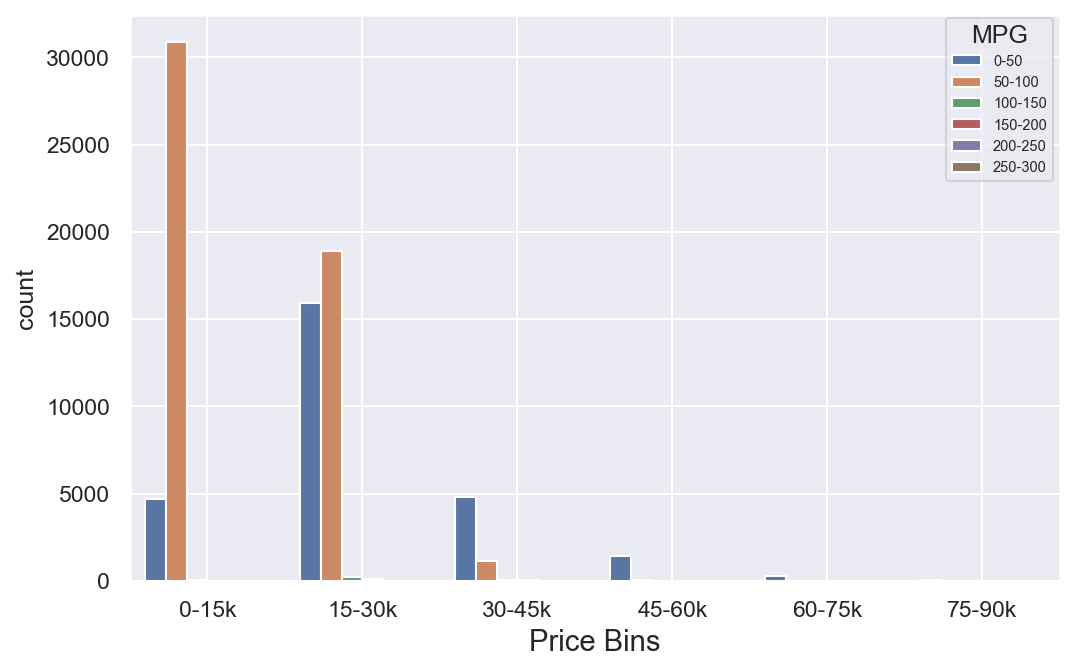

In [66]:
fig = plt.figure(figsize = (8,5))
sns.countplot(data=df, x='priceBins', hue='mpgBins')
plt.legend(bbox_to_anchor=(1,0.85), title="MPG", fontsize=7, loc='right')
plt.xlabel('Price Bins', fontsize=14)
plt.grid(visible=True, which='both')
plt.show()

In [67]:
df.head(2)

make model  year  price transmission  mileage fuelType  tax   mpg  \
0  audi    A1  2017  12500       Manual    15735   Petrol  150  55.4   
1  audi    A6  2016  16500    Automatic    36203   Diesel   20  64.2   

   engineSize priceBins  taxBins mpgBins  
0         1.4     0-15k  100-200  50-100  
1         2.0    15-30k    0-100  50-100

## Engine Size

In [28]:
df['engineSize'].describe()

count    78810.000000
mean         1.722321
std          0.591430
min          0.000000
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64

In [38]:
df['make'].value_counts()

ford       17962
vw         15157
merc       13118
bmw        10778
audi       10668
skoda       6267
hyundai     4860
Name: make, dtype: int64

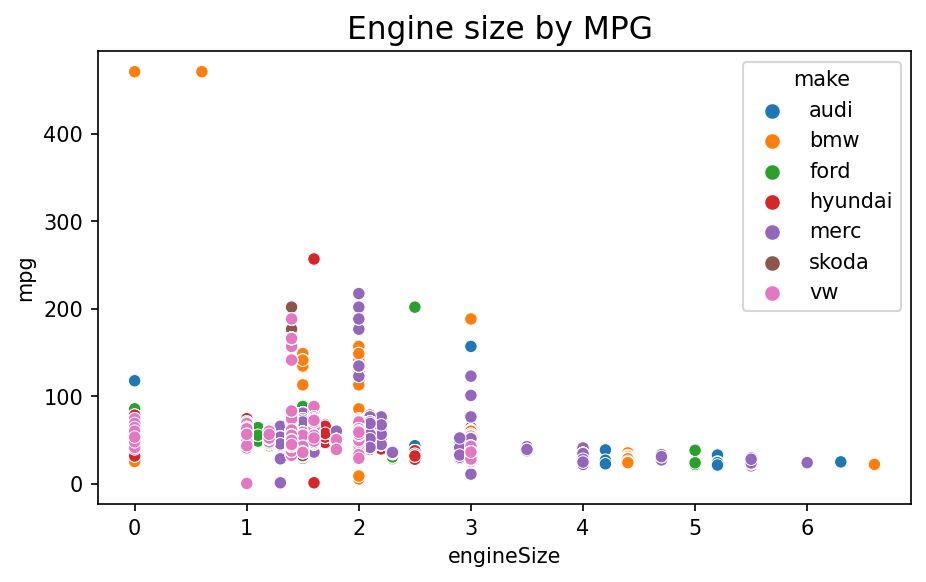

In [52]:
plt.figure(figsize=(7,4))
plt.title("Engine size by MPG ",fontsize = 15)
sns.scatterplot(data = morethan2015, y = 'mpg', x = 'engineSize', hue='make')
# plt.ylabel("Price ")
# plt.xlabel("MPG")
# sns.despine()
plt.show()

In [43]:
vwandmerc = df.loc[df['make'].isin(['vw','merc'])]

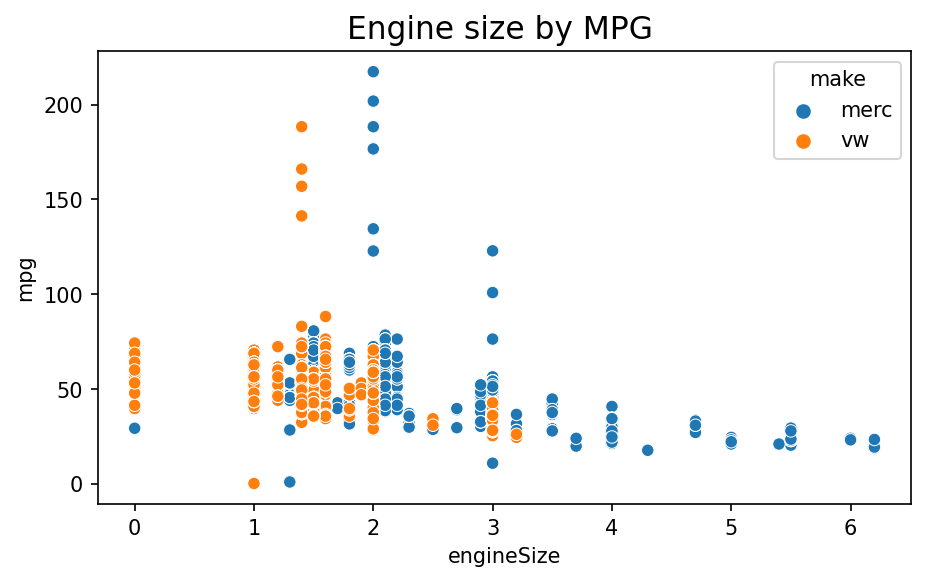

In [53]:
plt.figure(figsize=(7,4))
plt.title("Engine size by MPG ",fontsize = 15)
sns.scatterplot(data = vwandmerc, y = 'mpg', x = 'engineSize', hue='make')
# plt.ylabel("Price ")
# plt.xlabel("MPG")
# sns.despine()
plt.show()

<AxesSubplot:xlabel='make', ylabel='engineSize'>

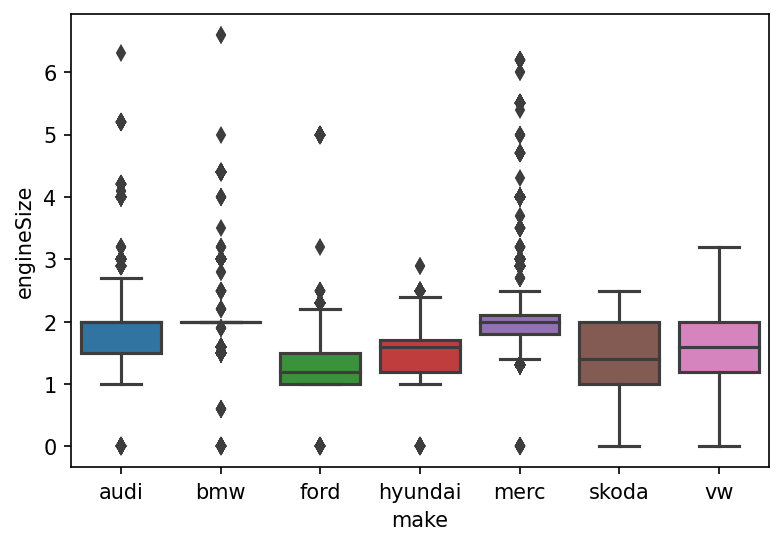

In [49]:
sns.boxplot(x='make', y='engineSize', data=df)

<AxesSubplot:xlabel='make', ylabel='price'>

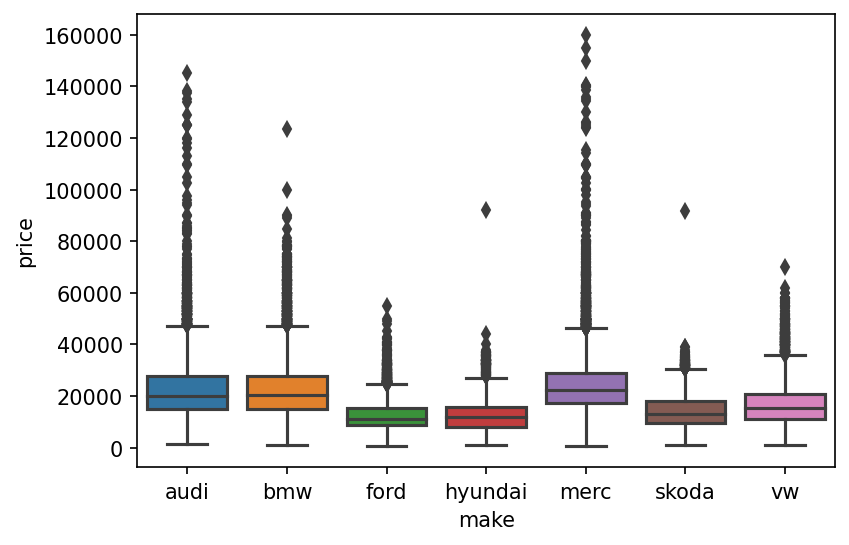

In [50]:
sns.boxplot(x='make', y='price', data=df)

<AxesSubplot:xlabel='make', ylabel='mpg'>

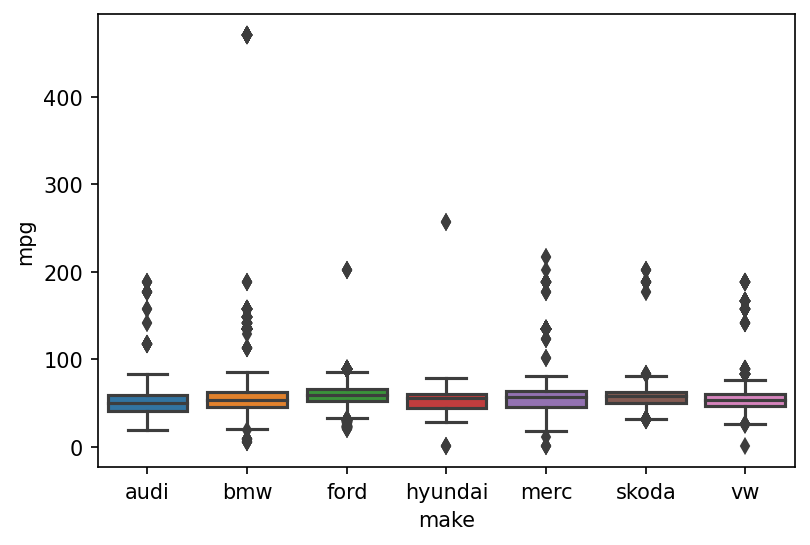

In [51]:
sns.boxplot(x='make', y='mpg', data=df)